# Image + Tabular Dataset | EDA | LightGBM

## Overview

### Goal
Identify cancers among skin lesions cropped from 3D total body photographs. <br>
In this competition, you'll develop image-based algorithms to identify histologically confirmed skin cancer cases with single-lesion crops from 3D total body photos (TBP). <br>
The image quality resembles close-up smartphone photos, which are regularly submitted for telehealth purposes. <br>
Bbinary classification algorithm could be used in settings without access to specialized care and improve triage for early skin cancer detection. <br>

3D TBD에서 잘라낸 피부 병변 중 암을 식별하는 것이 목표이다. <br>
3D total body photos (TBP)에서 single-lesion crops을 사용해 조직학적으로 확인된 피부암 사례를 식별하는 image-based algorithms을 개발한다. <br>

### Evaluation 
**Primary Scoring Metric** <br>
Submissions are evaluated on [partial area under the ROC curve (pAUC)](https://en.wikipedia.org/wiki/Partial_Area_Under_the_ROC_Curve) above 80% true positive rate (TPR) for binary classification of malignant examples. (See the implementation in the notebook [ISIC pAUC-aboveTPR](https://www.kaggle.com/code/metric/isic-pauc-abovetpr).) <br>

pAUC는 ROC 곡선의 특정 부분, 즉 TPR(참 양성 비율)이 80% 이상인 영역을 평가한다. <br>
이는 높은 민감도를 요구하는 실제 임상 환경을 반영하기 위함이다. <br>
점수는 [0.0, 0.2] 범위 내에서 주어지며, TPR 80% 이상에서의 분류 성능을 강조한다. Image에서 파란색과 빨간색 영역이 각각 두 Algorithm의 pAUC를 나타낸다. <br>

### Submission File
For each image (`isic_id`) in the test set, you must predict the probability (`target`) that the lesion is **malignant**. The file should contain a header and have the following format: <br>
Test Set에 포함된 Image(’isic_id’)에 대해 **malignant**(악성)일 확률(’target’)을 예측해야 한다. <br>
Submission File에는 Header가 포함되어야 하며, 아래와 같은 형식이다. <br>
```python 
isic_id,target
ISIC_0015657,0.7
ISIC_0015729,0.9
ISIC_0015740,0.8
etc.
```

### Timeline
- **June 26, 2024** - Start Date.
- **August 30, 2024** - Entry Deadline. You must accept the competition rules before this date in order to compete.
- **August 30, 2024** - Team Merger Deadline. This is the last day participants may join or merge teams.
- **September 6, 2024** - Final Submission Deadline.
- **September 20, 2024** - Deadline for potential prize-winners to publish their solution code and write-ups. <br>
All deadlines are at 11:59 PM UTC on the corresponding day unless otherwise noted. The competition organizers reserve the right to update the contest timeline if they deem it necessary.

## Dataset

### Directory Structure
```
├── /kaggle/working
└── /kaggle/input/isic-2024-challenge/train-image
    ├── train-image/
    │   └── image/
    │       ├── ISIC_0015670.jpg
    │       ├── ISIC_0015845.jpg
    │       └── ...
    │    
    ├── test-image/
    │   └── image/
    │       └── ...
    │    
    ├── sample_submission.csv
    ├── test-image.hdf5
    ├── test-metadata.csv
    ├── train-image.hdf5
    └── train-metadata.csv
```

### Description

**File**
- **train-image/** : Image files for the training set(Provided for train only). Train Set에 포함된 Image File들이 저장되어 있는 Directory. 
- **train-image.hdf5** : Training image data contained in a single hdf5 file, with the isic_id as key. Train Image Data를 하나의 hdf5 File로 저장한 것이다. 이 File은 isic_id를 Key로 각 Image를 저장하고 있어 효율적인 Data 접근이 가능하다.
- **train-metadata.csv** : Metadata for the training set. Train Set Image에 대한 Metadata를 포함하는 CSV File. 이 File에는 isic_id, patient_id, target 등 중요한 정보가 있다.  
- **test-image.hdf5** : Test image data contained in a single hdf5 file, with the isic_id as key. This contains 3 test examples to ensure your inference pipeline works correctly. When the submitted notebook is rerun, this file is swapped with the full hidden test set, which contains approximately 500k images. Test Image Data를 하나의 hdf5 File로 저장한 것이다.  
- **test-metadata.csv** : Metadata for the test subset. Test Set에 대한 Metadata를 포함하는 CSV File. 이 File은 train-metadata.csv와 구조가 동일하지만 taget Field는 포함되지 않는다. Test Set은 Model의 예측 성능을 평가하기 위한 것이다. 
- **sample_submission.csv** : A sample submission file in the correct format. 올바른 제출 형식을 보여주는 Sample File이다. 

**Metadata**
- **lesion_id** : 관심 병변에 대한 고유 식별자이다. 병변이 중요하다 판단된 경우 수동으로 Tag 된다. 
- **iddx_full ~ iddx_5** : 병변에 대한 세부적인 진단 정보이다. iddx_full은 완전히 분류된 진단 정보, iddx_1부터 iddx_5까지 점진적인 세부 진단을 나타낸다. 
- **mel_thick_mm** : 흑색종의 깊이를 나타내며 종양의 진행 정도를 평가한다. 
- **tbp_lv_dnn_lesion_confidence** : 병변 확신도 점수, 0-100 사이의 값을 가지며 병변이 악성일 가능성을 나타낸다.  

<br>
    
**```train-metadata.csv```**

| Field Name | Description |
| :--- | :--- |
| target | Binary class {0: benign, 1: malignant}. |
| lesion_id | Unique lesion identifier. Present in lesions that were manually tagged as a lesion of interest. 병변의 고유 식별자.  |
| iddx_full | Fully classified lesion diagnosis. 병변 전체의 진단. iddx_1-iddx_5를 :: 구분자로 합쳐놓은 상태.  |
| iddx_1 | First level lesion diagnosis. 1차 진단 범주. |
| iddx_2 | Second level lesion diagnosis. 2차 진단 범주. |
| iddx_3 | Third level lesion diagnosis. 3차 진단 범주. |
| iddx_4 | Fourth level lesion diagnosis. 4차 진단 범주. |
| iddx_5 | Fifth level lesion diagnosis. 5차 진단 범주. |
| mel_mitotic_index | Mitotic index of invasive malignant melanomas. 침윤성 악성 흑색종의 유사 분열 지수. |
| mel_thick_mm | Thickness in depth of melanoma invasion. 흑색종 침윤 두께. |
| tbp_lv_dnn_lesion_confidence | Lesion confidence score (0-100 scale). + 병변 NN 신뢰도 점수.  |

<br>

**```train-metadata.csv and test-metadata.csv```**


| Field Name | Description |
| :--- | :--- |
| isic_id | Unique case identifier. 각 Sample의 고유 식별자.  |
| patient_id | Unique patient identifier. 환자의 고유 식별자.  |
| age_approx | Approximate age of patient at time of imaging. 촬영 당시 환자의 대략적인 나이.  |
| sex | Sex of the person. |
| anatom_site_general | Location of the lesion on the patient's body. 병변이 위치한 신체 부위. |
| clin_size_long_diam_mm | Maximum diameter of the lesion (mm). + 병변의 최대 직경.  |
| image_type | Structured field of the ISIC Archive for image type. 이미지 유형(구조화 된 Field). |
| tbp_tile_type | Lighting modality of the 3D TBP source image. 3D TBP 원본 Image의 조명 방식 |
| tbp_lv_A | A inside lesion. + 병변 내부의 A 값. |
| tbp_lv_Aex | A outside lesion. + 병변 외부의 A 값.  |
| tbp_lv_B | B inside lesion. + 병변 내부의 B 값. |
| tbp_lv_Bext | B outside lesion.+ 병변 외부의 B 값.  |
| tbp_lv_C | Chroma inside lesion.+ 병변 내부의 색도. |
| tbp_lv_Cext | Chroma outside lesion.+ 병변 외부의 색도. |
| tbp_lv_H | Hue inside the lesion, calculated as the angle of A* and B* in L*A*B* color space.  Typical values range from 25 (red) to 75 (brown). + 병변 내부의 색상.  |
| tbp_lv_Hext | Hue outside lesion. + 병변 외부의 색상. |
| tbp_lv_L | L inside lesion. + 병변 내부의 명도. |
| tbp_lv_Lext | L outside lesion. + 병변 외부의 명도.  |
| tbp_lv_areaMM2 | 병변의 면적.  |
| tbp_lv_area_perim_ratio | Border jaggedness, the ratio between lesions perimeter and area.  Circular lesions will have low values, irregular shaped lesions will have higher values. Values range 0-10. + 병변 경계의 울퉁불퉁함의 비율. |
| tbp_lv_color_std_mean | Color irregularity, calculated as the variance of colors within the lesion's boundary. 병변 경계 내 색상 불규칙성.  |
| tbp_lv_deltaA | Average A contrast (inside vs. outside lesion). + 병변 내 외부의 A 대비값. |
| tbp_lv_deltaB | Average B contrast (inside vs. outside lesion). + 병변 내 외부의 B 대비값. |
| tbp_lv_deltaL | Average L contrast (inside vs. outside lesion). + 병변 내 외부의 명도 대비값. |
| tbp_lv_deltaLB | 병변의 명도 및 색상 대비값.  |
| tbp_lv_deltaLBnorm | Contrast between the lesion and its immediate surrounding skin. Low contrast lesions tend to be faintly visible such as freckles, high contrast lesions tend to be those with darker pigment. Calculated as the average delta L*B* of the lesion relative to its immediate background in L*A*B* color space. Typical values range from 5.5 to 25. + 병변과 주변 피부의 명도 및 색상 대비.  |
| tbp_lv_eccentricity | Eccentricity. + 병변의 이심률. |
| tbp_lv_location | Classification of anatomical location, divides arms & legs to upper & lower, torso into thirds. + 병변의 해부학적 위치(팔, 다리, 몸통 등으로 구분). |
| tbp_lv_location_simple | Classification of anatomical location, simple. + 병변의 간단한 해부학적 위치. |
| tbp_lv_minorAxisMM | Smallest lesion diameter (mm). + 병변의 최소 직경. |
| tbp_lv_nevi_confidence | Nevus confidence score (0-100 scale) is a convolutional neural network classifier estimated probability that the lesion is a nevus.  The neural network was trained on approximately 57,000 lesions that were classified and labeled by a dermatologist. +, ++ 병변이 모반일 가능성에 대한 NN 에측 확률. |
| tbp_lv_norm_border | Border irregularity (0-10 scale), the normalized average of border jaggedness and asymmetry. + 경계 불규칙성 |
| tbp_lv_norm_color | Color variation (0-10 scale), the normalized average of color asymmetry and color irregularity. + 색상 변이(정규화 된 값). |
| tbp_lv_perimeterMM | Perimeter of lesion (mm). + 병변의 둘레. |
| tbp_lv_radial_color_std_max | Color asymmetry, a measure of asymmetry of the spatial distribution of color within the lesion. This score is calculated by looking at the average standard deviation in L*A*B* color space within concentric rings originating from the lesion center. Values range 0-10. + 병변 내 색상의 비대칭성 |
| tbp_lv_stdL | Standard deviation of L inside lesion. + 병변 내부 명도의 표준 편차.  |
| tbp_lv_Lext | Standard deviation of L outside lesion. + 병변 외부 명도의 표준 편차. |
| tbp_lv_symm_2axis | Border asymmetry, a measure of asymmetry of the lesion's contour about an axis perpendicular to the lesion's most symmetric axis.  Lesions with two axes of symmetry will therefore have low scores (more symmetric), while lesions with only one or zero axes of symmetry will have higher scores (less symmetric). This score is calculated by comparing opposite halves of the lesion contour over many degrees of rotation.  The angle where the halves are most similar identifies the principal axis of symmetry, while the second axis of symmetry is perpendicular to the principal axis. Border asymmetry is reported as the asymmetry value about this second axis. Values range 0-10. + 병변 경계 비대칭성. |
| tbp_lv_symm_2axis_angle | Lesion border asymmetry angle. + 병변 경계 비대칭성 각도.  |
| tbp_lv_x | X-coordinate of the lesion on 3D TBP. + 3D TBP에서 병변의 X 좌표.  |
| tbp_lv_y | Y-coordinate of the lesion on 3D TBP. + 3D TBP에서 병변의 Y 좌표. |
| tbp_lv_z | Z-coordinate of the lesion on 3D TBP. + 3D TBP에서 병변의 Z 좌표. |
| attribution | Image attribution, synonymous with image source. |
| copyright_license | Copyright license. |

## Import Library and Config

In [1]:
# Ignore Warnings
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import polars as pl
import os
from pathlib import Path

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import StratifiedGroupKFold
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import VotingClassifier

from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler

import lightgbm as lgb

import time
from sklearn.feature_selection import SelectKBest, chi2, mutual_info_classif, VarianceThreshold

## Data Loading and Setting

In [2]:
df_train = pd.read_csv('/kaggle/input/isic-2024-challenge/train-metadata.csv')
df_test  = pd.read_csv('/kaggle/input/isic-2024-challenge/test-metadata.csv')

# Pandas 출력 Option 설정 
pd.set_option('display.max_columns',100 , ) # 최대 100개의 열을 표시되도록 설정
pd.set_option('display.width', 200) # 최대 200자까지 한줄로 표시되도록 설정

In [3]:
df_train

,isic_id,target,patient_id,age_approx,sex,anatom_site_general,clin_size_long_diam_mm,image_type,tbp_tile_type,tbp_lv_A,tbp_lv_Aext,tbp_lv_B,tbp_lv_Bext,tbp_lv_C,tbp_lv_Cext,tbp_lv_H,tbp_lv_Hext,tbp_lv_L,tbp_lv_Lext,tbp_lv_areaMM2,tbp_lv_area_perim_ratio,tbp_lv_color_std_mean,tbp_lv_deltaA,tbp_lv_deltaB,tbp_lv_deltaL,tbp_lv_deltaLB,tbp_lv_deltaLBnorm,tbp_lv_eccentricity,tbp_lv_location,tbp_lv_location_simple,tbp_lv_minorAxisMM,tbp_lv_nevi_confidence,tbp_lv_norm_border,tbp_lv_norm_color,tbp_lv_perimeterMM,tbp_lv_radial_color_std_max,tbp_lv_stdL,tbp_lv_stdLExt,tbp_lv_symm_2axis,tbp_lv_symm_2axis_angle,tbp_lv_x,tbp_lv_y,tbp_lv_z,attribution,copyright_license,lesion_id,iddx_full,iddx_1,iddx_2,iddx_3,iddx_4,iddx_5,mel_mitotic_index,mel_thick_mm,tbp_lv_dnn_lesion_confidence
0,ISIC_0015670,0,IP_1235828,60.0,male,lower extremity,3.04,TBP tile: close-up,3D: white,20.244422,16.261975,26.922447,23.954773,33.684638,28.953117,53.058545,55.828924,54.367448,62.025701,3.152561,27.476170,0.000000,3.982447,2.967674,-7.658253,8.360566,5.784302,0.901302,Right Leg - Upper,Right Leg,1.543016,2.628592e-03,7.091360,0.000000,9.307003,0.000000,2.036195,2.637780,0.590476,85,-182.703552,613.493652,-42.427948,Memorial Sloan Kettering Cancer Center,CC-BY,NaN,Benign,Benign,NaN,NaN,NaN,NaN,NaN,NaN,97.517282
1,ISIC_0015845,0,IP_8170065,60.0,male,head/neck,1.10,TBP tile: close-up,3D: white,31.712570,25.364740,26.331000,24.549290,41.219030,35.299260,39.702910,44.064040,48.861520,55.362360,0.919497,12.235290,0.000000,6.347830,1.781713,-6.500838,6.839008,4.987244,0.639885,Head & Neck,Head & Neck,0.821918,1.334303e-07,2.116402,0.000000,3.354148,0.000000,0.853227,3.912844,0.285714,55,-0.078308,1575.687000,57.174500,Memorial Sloan Kettering Cancer Center,CC-BY,IL_6727506,Benign,Benign,NaN,NaN,NaN,NaN,NaN,NaN,3.141455
2,ISIC_0015864,0,IP_6724798,60.0,male,posterior torso,3.40,TBP tile: close-up,3D: XP,22.575830,17.128170,37.970460,33.485410,44.174920,37.611800,59.265850,62.909730,53.961180,61.670520,3.265153,24.184620,0.000000,5.447655,4.485044,-7.709336,9.092376,6.290359,0.932147,Torso Back Top Third,Torso Back,1.194905,2.959177e-04,4.798335,0.000000,8.886309,0.000000,1.743651,1.950777,0.361905,105,123.649700,1472.010000,232.908900,Memorial Sloan Kettering Cancer Center,CC-BY,NaN,Benign,Benign,NaN,NaN,NaN,NaN,NaN,NaN,99.804040
3,ISIC_0015902,0,IP_4111386,65.0,male,anterior torso,3.22,TBP tile: close-up,3D: XP,14.242329,12.164757,21.448144,21.121356,25.746200,24.374023,56.414429,60.060388,18.649518,23.314841,6.079940,14.889242,0.514520,2.077572,0.326788,-4.665323,4.783413,6.400196,0.654458,Torso Front Top Half,Torso Front,2.481328,2.198945e+01,1.975874,1.771705,9.514499,0.664690,1.258541,1.573733,0.209581,130,-141.024780,1442.185791,58.359802,ACEMID MIA,CC-0,NaN,Benign,Benign,NaN,NaN,NaN,NaN,NaN,NaN,99.989998
4,ISIC_0024200,0,IP_8313778,55.0,male,anterior torso,2.73,TBP tile: close-up,3D: white,24.725520,20.057470,26.464900,25.710460,36.217980,32.608740,46.946070,52.041180,46.276310,54.855740,2.101708,19.902560,0.000000,4.668053,0.754434,-8.579431,9.148495,6.531302,0.946448,Torso Front Top Half,Torso Front,0.929916,1.378832e-03,3.658854,0.000000,6.467562,0.000000,2.085409,2.480509,0.313433,20,-72.315640,1488.720000,21.428960,Memorial Sloan Kettering Cancer Center,CC-BY,NaN,Benign,Benign,NaN,NaN,NaN,NaN,NaN,NaN,70.442510
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
401054,ISIC_9999937,0,IP_1140263,70.0,male,anterior torso,6.80,TBP tile: close-up,3D: XP,22.574335,14.944666,27.663259,26.767135,35.705132,30.656525,50.784168,60.824438,36.333547,53.341997,22.893601,17.842449,2.579861,7.629668,0.896124,-17.008450,17.187750,13.498163,0.744495,Torso Front Top Half,Torso Front,4.877998,9.936233e+01,3.101811,7.348126,20.210836,2.328066,7.054819,2.169398,0.288920,100,147.187256,1182.317505,122.652588,"De

In [4]:
df_test

,isic_id,patient_id,age_approx,sex,anatom_site_general,clin_size_long_diam_mm,image_type,tbp_tile_type,tbp_lv_A,tbp_lv_Aext,tbp_lv_B,tbp_lv_Bext,tbp_lv_C,tbp_lv_Cext,tbp_lv_H,tbp_lv_Hext,tbp_lv_L,tbp_lv_Lext,tbp_lv_areaMM2,tbp_lv_area_perim_ratio,tbp_lv_color_std_mean,tbp_lv_deltaA,tbp_lv_deltaB,tbp_lv_deltaL,tbp_lv_deltaLB,tbp_lv_deltaLBnorm,tbp_lv_eccentricity,tbp_lv_location,tbp_lv_location_simple,tbp_lv_minorAxisMM,tbp_lv_nevi_confidence,tbp_lv_norm_border,tbp_lv_norm_color,tbp_lv_perimeterMM,tbp_lv_radial_color_std_max,tbp_lv_stdL,tbp_lv_stdLExt,tbp_lv_symm_2axis,tbp_lv_symm_2axis_angle,tbp_lv_x,tbp_lv_y,tbp_lv_z,attribution,copyright_license
0,ISIC_0015657,IP_6074337,45.0,male,posterior torso,2.70,TBP tile: close-up,3D: XP,22.80433,20.007270,28.38412,27.043640,36.410100,33.640000,51.220960,53.505430,24.97985,31.114600,3.846876,22.907010,0.461149,2.797056,1.340481,-6.134747,6.436557,6.843057,0.664465,Torso Back Top Third,Torso Back,2.187644,1.698104e-02,5.435366,1.143374,9.387248,0.304827,1.281532,2.299935,0.479339,20,-155.06510,1511.222000,113.980100,Memorial Sloan Kettering Cancer Center,CC-BY
1,ISIC_0015729,IP_1664139,35.0,female,lower extremity,2.52,TBP tile: close-up,3D: XP,16.64867,9.657964,31.31752,27.524318,35.467806,29.169579,62.004494,70.664619,59.90409,68.141071,2.120473,18.957821,0.000000,6.990705,3.793202,-8.236981,9.151127,6.083388,0.926698,Left Leg - Upper,Left Leg,1.032666,2.107364e-01,4.322201,0.000000,6.340311,0.000000,1.271940,2.011223,0.426230,25,-112.36924,629.535889,-15.019287,"Frazer Institute, The University of Queensland...",CC-BY
2,ISIC_0015740,IP_7142616,65.0,male,posterior torso,3.16,TBP tile: close-up,3D: XP,24.25384,19.937380,30.46368,28.384240,38.939500,34.686660,51.474730,54.915410,35.81945,41.358640,3.396510,19.464400,0.251236,4.316465,2.079433,-5.539191,6.041092,5.446997,0.894776,Torso Back Top Third,Torso Back,1.520786,8.052259e-13,3.968912,0.721739,8.130868,0.230742,1.080308,2.705857,0.366071,110,-84.29282,1303.978000,-28.576050,FNQH Cairns,CC-BY


# Exploratory Data Analysis

## Target Distribution Visualize

'df_train' Data의 'target' Col을 기준으로 양성(Benign)과 악성(Malignant) Class의 분포를 원형 Graph로 Visualize.

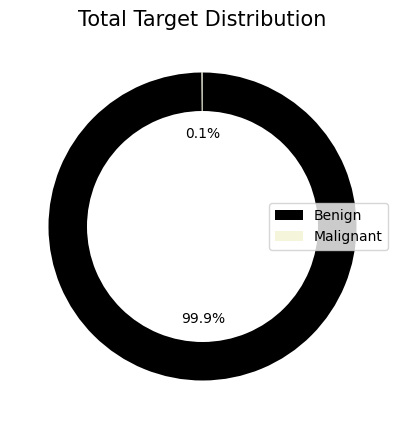

In [5]:
base_color = '#F5F5DC' 
name = ['Benign', 'Malignant']
Title_size = 15

# p = [base_color, 'black']
p = ['black', base_color]

plt.figure(figsize = (5, 5))
plt.pie(df_train.target.value_counts(normalize = True), autopct = '%1.1f%%', # autopct : Pie Chart 내 백분율을 표시한다. 
colors = sns.color_palette(p), startangle = 90, wedgeprops = dict(width = 0.25), labeldistance = 1.2, 
counterclock = False, radius = 1)
plt.title(f'Total Target Distribution', color = 'black', fontsize = 15)
plt.legend(name, loc = 'center right',  prop = {'size': 10}, markerscale = 3, framealpha = 0.8, facecolor = 'white')

plt.show()

Target distribution is very imbalance. <br>
Target 분포는 매우 불균형한 상태이다.

## Visualize the Age Distribution of Benign and Malignant Lesions with Histogram

'df_train' Data Frame의 'age_approx' Row를 사용해 양성(Benign)과 악성(Malignant)의 나이 분포를 Histogram으로 Visualize.

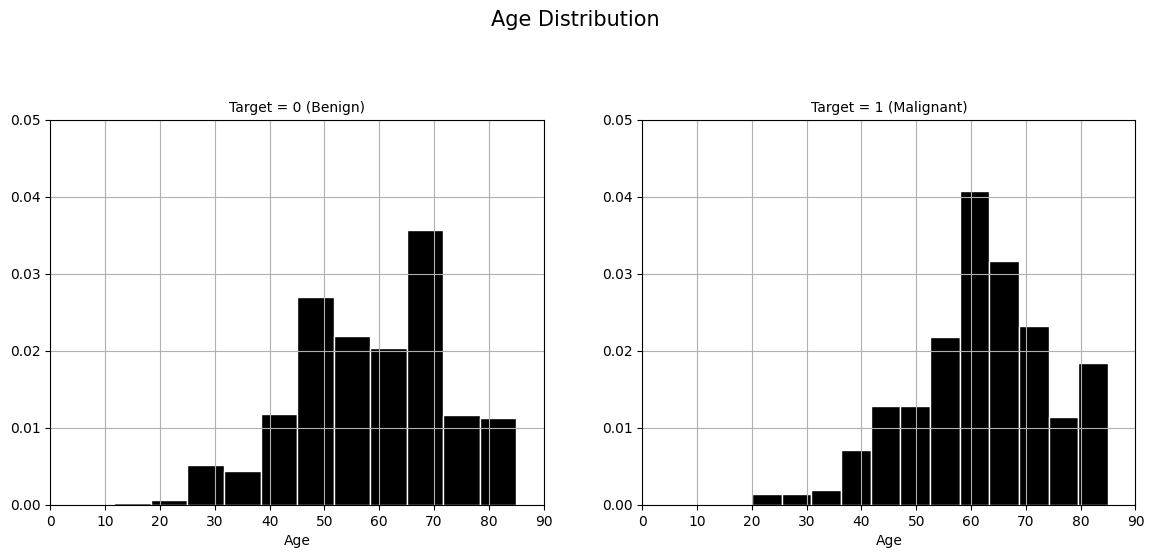

In [6]:
ymax = 0.05 # y축 최대 값을 0.05로 설정, Histogram의 y축 범위를 제한해 Graph가 일정 범위 내에서 표시되도록 한다.  
xmax = 90 # x축 최대 값을 90으로 설정, 'age_approx'가 90세 이하로 제한된다. 
bins = 12 # Histogram에서 사용될 bin의 갯수를 12로 설정, 90세까지의 나이를 12 구간으로 나누어 Histogram을 생성한다. 

# 전체 Graph 크기 설정 
plt.figure(figsize = (14, 5))
plt.suptitle("Age Distribution", fontsize = 15, y = 1.1)

# 첫 번째 Hitogram (Benign Data)
plt.subplot(1, 2, 1)
# 'target'이 0(양성)인 Data에 대해 'age_approx'(나이)의 Histogram을 생성한다. 
df_train[df_train.target == 0].age_approx.hist(color = 'black',  edgecolor = 'white', density = True, bins = bins)
plt.xlabel(f'Age', fontsize = 10, color = 'black')
plt.title(f'Target = 0 (Benign)', color = 'black', fontsize = 10)
plt.ylim([0, ymax])
plt.xlim([0, xmax])

# 두 번째 Histogram (Malignant Data)
plt.subplot(1, 2, 2)
# 'target'이 1(음성)인 Data에 대해 'age_approx'(나이)의 Histogram을 생성한다. 
df_train[df_train.target == 1].age_approx.hist(color = 'black',  edgecolor = 'white', density = True, bins = bins)
plt.title(f'Target = 1 (Malignant)', color = 'black', fontsize = 10)
plt.ylim([0, ymax])
plt.xlim([0, xmax])
plt.xlabel(f'Age', fontsize = 10, color = 'black')

plt.show()

1. 양성 병변 (Target = 0)
- 50세 이상에서 양성 병변의 빈도가 증가하고 있으며, 60-70대에서 빈도가 가장 높다.

2. 악성 병변 (Target = 1)
- 60세에서 악성 병변의 발생 빈도가 가장 높으며, 이는 양성 병변과 유사한 경향을 보인다.

3.  양성(Benign)과 악성(Malignant)의 분포 비교
- 양성 병변은 상대적으로 폭 넓은 나이대에서 발생하지만 특히 60세에서 높은 빈도를 보인다. <br>
    **악성 병변은 50세 이후 집중적으로 발생하며, 60세에서 가장 높은 빈도를 보인다.** <br>
    두 Histogram의 분포는 유사하지만 악성 병변의 분포가 더 좁고 특정 나이대에 집중되어 있는 차이점이 있다. 

## Visualize the Distribution of Anatomical Areas where Benign and Malignant Lesions Occurred as Histograms

'df_train' Data Frame에서 'anatom_site_general' Row를 사용해 양성(Benign)과 악성(Malignant) 병변이 발생한 해부학적 부위의 분포를 Histogram으로 Visualize. <br>
각 Cell은 두 가지 서로 다른 Target 값에 대한 Histogram을 보여준다.

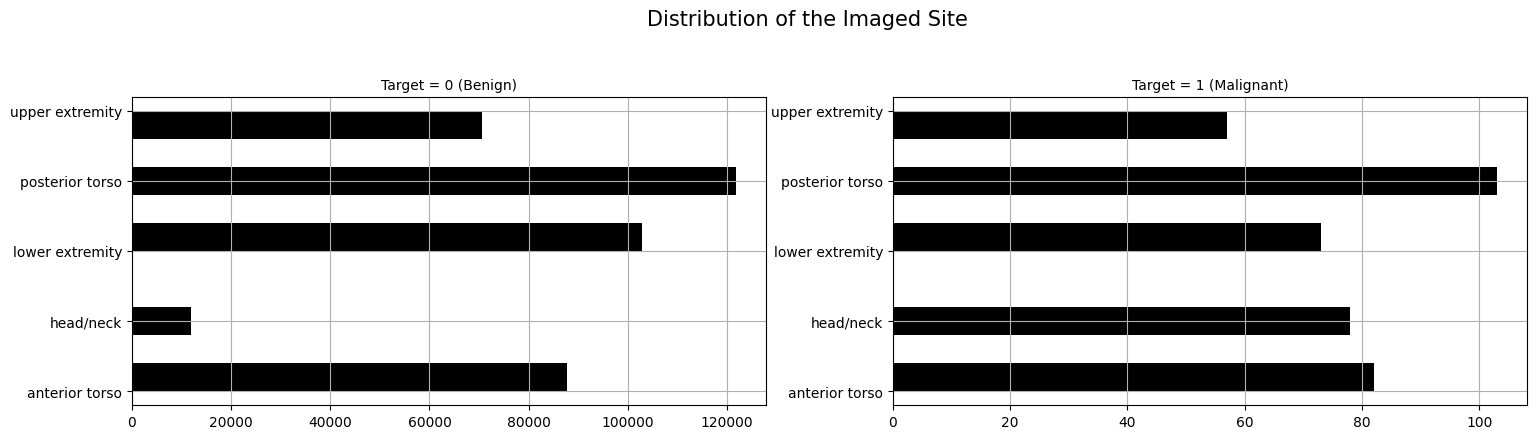

In [7]:
# Graph의 크기를 설정
plt.figure(figsize = (18, 4))
plt.suptitle("Distribution of the Imaged Site", fontsize = 15, y = 1.1)

# 첫 번째 Historgram (Benign Data)
plt.subplot(1, 2, 1)
df_train[df_train.target == 0].anatom_site_general.sort_values().hist(color = 'black', orientation = 'horizontal')
plt.title(f'Target = 0 (Benign)', color = 'black', fontsize = 10)

# 두 번째 Hitogram (Malignant Data) 
plt.subplot(1, 2, 2)
df_train[df_train.target == 1].anatom_site_general.sort_values().hist(color = 'black', orientation = 'horizontal')
plt.title(f'Target = 1 (Malignant)', color = 'black', fontsize = 10)

plt.show()

1. 부위별 병변 분포
- **Upper Extremity(상지)** : 양성 병변과 악성 병변 모두 상지에서 많은 병변이 발견되지만 양성 병변이 조금 더 많은 수를 차지한다. <br>
- **Posterior Torso(후면 몸통)** : 양성 병변과 악성 병변 모두 후면 몸통에서 발견되며 두 분포가 비슷하게 나타난다. <br>
- **Lower Extremity(하지)** : 하지에서도 양성 변변이 악성 병변보다 더 많이 발생하는 경향이 보인다. <br>
- **Head & Neck(머리 & 목)** : 머리와 목 부위에서 양성보다 악성 병변이 상대적으로 더 많이 발견된다. <br>
- **Anterioi Torso(전면 몸통)** : 전면 몸통에에서 양성과 악성 모두 일정한 빈도로 병변이 발생하지만 양성 변변이 더 많이 발견된다. 

2. 양성(Benign)과 악성(Malignant)의 상대적 분포
- 전반적으로 양성 병변이 더 넓은 범위로 해부학적 부위에 걸쳐 많이 발생하는 반면, **악성 병변은 특정 부위에 집중된 경향을 보인다.** <br>
    **특히 머리, 목 부위에서 악성 병변이 상대적으로 높은 비율로 발생한다.**

## Visualize Benign and Malignant Size Distributions with Histogram

'df_train' Data Frame의 'clin_size_long_diam_mm' Row를 사용해 양성(Benign)과 악성(Malignant) 크기 분포를 Histogram으로 Visualize. <br>
각 Cell은 양성 병변과 악성 병변에 대한 크기 분포를 비교해 보여준다. 

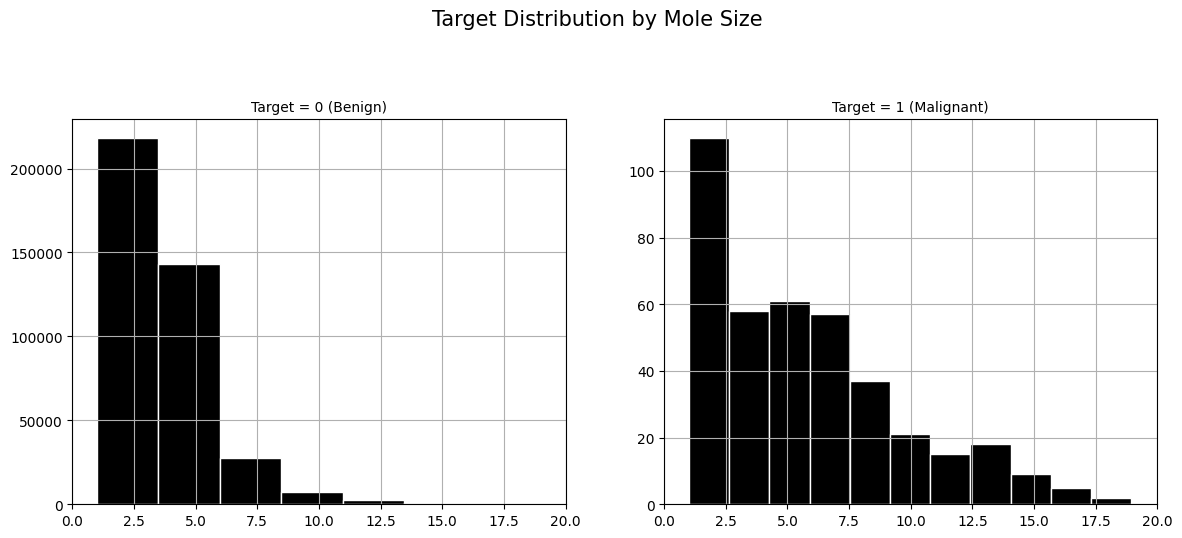

In [8]:
xmax = 20 # x축의 최대 값을 20으로 설정, Histogram에서 x축 범위가 0-20까지 표시된다는 것을 의미한다. 
b = 11 # 병변의 크기를 11개의 구간으로 나누어 Histogram으로 생성한다. 

plt.figure(figsize = (14, 5))
plt.suptitle("Target Distribution by Mole Size", fontsize = 15, y = 1.1)

# 첫 번째 Historgram (Benign Data)
plt.subplot(1, 2, 1)
df_train[df_train.target == 0].clin_size_long_diam_mm.sort_values().hist(color = 'black',  edgecolor = 'white',bins = b)
plt.title(f'Target = 0 (Benign)', color = 'black', fontsize = 10)
plt.xlim([0, xmax])

# 두 번째 Hitogram (Malignant Data) 
plt.subplot(1, 2, 2)
df_train[df_train.target == 1].clin_size_long_diam_mm.sort_values().hist(color = 'black',  edgecolor = 'white',bins = b)
plt.title(f'Target = 1 (Malignant)', color = 'black', fontsize = 10)
plt.xlim([0, xmax])

plt.show()

1. 병변 크기 분포
- 양성(Benign)
    - 주로 0-5mm 사이의 작은 크기에서 많이 발생한다. 
    - 특히 2.5mm에서 가장 높은 분포를 보이며 5mm를 넘어가면 병변의 빈도가 급격히 감소한다. 
- 악성(Malignant)
    - 악성 또한 주로 2.5mm에서 가장 높은 분포를 보인다. 
    - 5mm에서 10mm 사이의 병변도 상당 수 발생한다. 

2. 양성(Benign)과 악성(Malignant)의 비교
- **병변의 크기가 클수록 악성 병변일 가능성이 높아진다.** <br>
    특히 10mm 이상의 병변에서는 악성 병변 여부를 신중히 판단할 필요가 있다. 

## Visualize the Relationship between the Mean Age of each Patient and the Number of Lesions (or Moles)

양성(Benign)인지 악성(Malignant) 병변을 가진 환자들의 평균 나이와 그들이 가진 병변 수 사이의 관계를 Visualize 한다. <br>
병변이 양성(Benign)인지 악성(Malignant)인지에 따라 두 개의 Scatter Plot를 나누어 비교한다. <br>

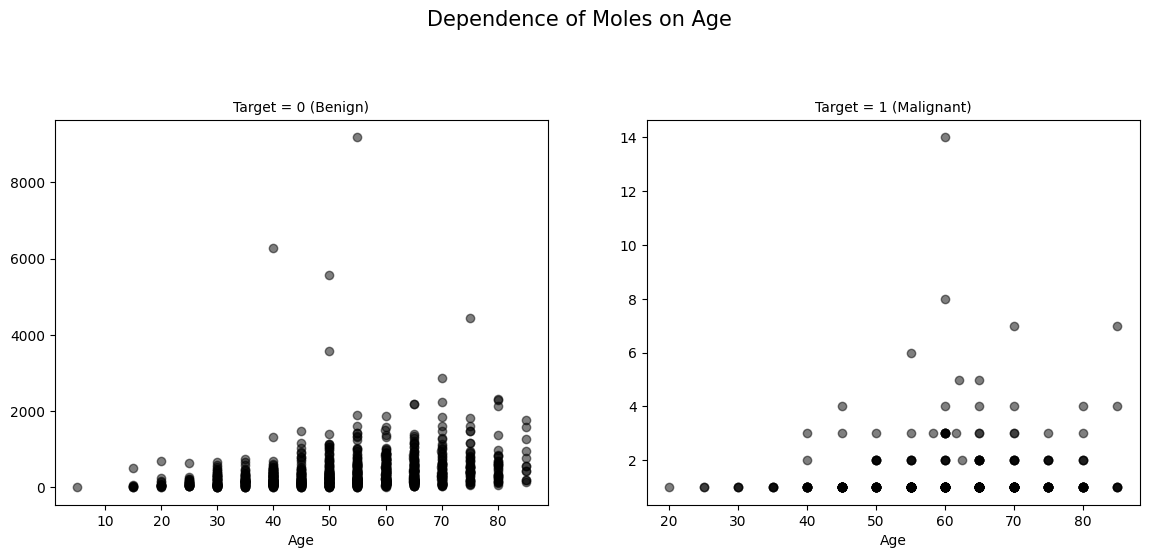

In [9]:
x0 = df_train[df_train.target == 0].groupby('patient_id')['age_approx'].mean()
y0 = df_train[df_train.target == 0].groupby('patient_id')['target'].count()

x1 = df_train[df_train.target == 1].groupby('patient_id')['age_approx'].mean()
y1 = df_train[df_train.target == 1].groupby('patient_id')['target'].count()

# Graph 크기를 설정 
plt.figure(figsize = (14, 5))
plt.suptitle("Dependence of Moles on Age", fontsize = 15, y = 1.1)

# 첫 번째 Historgram (Benign Data)
plt.subplot(1, 2, 1)
# x0 : x축, 환자의 평균 나이 
# y0 : y축, 환자가 가진 병변의 갯수 
plt.scatter(x0, y0, color = 'black',  alpha = 0.5)
plt.title(f'Target = 0 (Benign)', color = 'black', fontsize = 10)
plt.xlabel(f'Age', fontsize = 10, color = 'black')

# 두 번째 Hitogram (Malignant Data) 
plt.subplot(1, 2, 2)
# x1 : x축, 환자의 평균 나이 
# y2 : y축, 환자가 가진 병변의 갯수 
plt.scatter(x1, y1, color = 'black',  alpha = 0.5)
plt.title(f'Target = 1 (Malignant)', color = 'black', fontsize = 10)
plt.xlabel(f'Age', fontsize = 10, color = 'black')

plt.show()

1. 양성(Benign)
- 나이와 병변 수의 관계
    - 대부분의 환자가 나이가 많아질수록 더 많은 병변을 가지고 있다. 
    - 특히 50-80세 사이 환자들 중 일부는 수천 개에 이르는 많은 병변을 가지고 있다. 

2. 악성(Malignant)
- 나이와 병변 수의 관계
    - 악성 병변의 경우 병변 수는 대부분 10개 이하로 제한되며 병변의 갯수가 급격히 많아지는 경우는 드물다. 
    - 병변 수가 많은 경우는 아주 적다. 

3. 양성(Benign)과 악성(Malignant)의 비교
- **양성 병변의 경우 병변 수가 많을 수 있지만 악성의 경우는 상대적으로 적은 갯수이다.**
- 양성 병변의 경우 나이가 들수록 병변의 수가 증가하는 경향이 있다. 
- **악성 병변의 경우 나이와 병변 수의 명확한 상관관계가 나타나지 않으며, 병변의 수는 상대적으로 일정한 범위 내에서 분포한다.**

## Box Plot Distribution

Data의 특정 Feature 분포를 Visualize 하기 위해 Box Plot을 생성하는 Function. <br>
'box_distr' Function을 사용해 'df_train' Data Frame의 특정 Feature를 기준으로 Box Plot을 생성, Visualize.

In [10]:
def box_distr(data, f_x, f_y, split, t, l):
    plt.figure(figsize = (8, 4))
    sns.boxplot(x = split, y = f_y, data = data, palette = p, hue = f_x,medianprops = {"color": "r", "linewidth": 1}, 
                showcaps = True, linewidth = 0.7, flierprops = {"marker": "x", 'markersize':3}, width = 0.6)
    plt.title(f'{t}')
    # plt.xlabel('Target Class')
    plt.ylabel(f'{f_y}')
    # plt.grid()
    plt.legend(loc = l,  prop = {'size': 10}, markerscale = 1, framealpha = 0.8)

    plt.show()

## Visualize Age Distribution within Male and Female

'box_distr' Function를 사용해 'df_train' Data Frame에서 'age_approx' Row을 기준으로 'sex'에 따라 나이의 분포를 Box Plot으로 Visualize <br>
'sex'(성별)에 따라 분할된 Group 내에서 'age_approx'(나이)의 분포를 'idxx_1' 이라는 변수를 기준으로 비교한다. <br>
성별, 나이, 병변의 성질의 관계를 분석한다. 

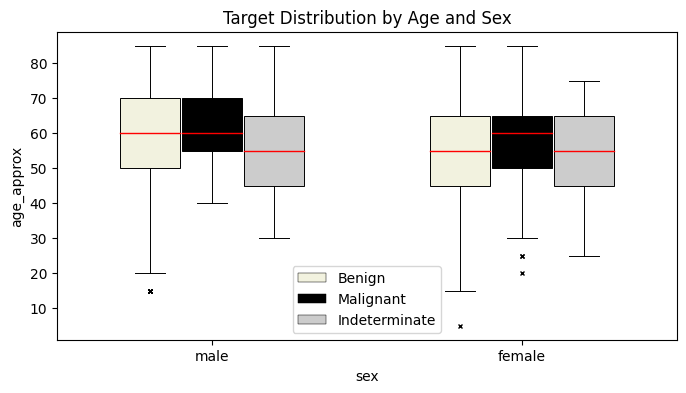

In [11]:
p = [base_color, 'black', '#cccccc']
f_x = 'iddx_1'
f_y = 'age_approx' # 'clin_size_long_diam_mm'
split = 'sex'
box_distr(df_train, f_x, f_y, split, 'Target Distribution by Age and Sex', 'lower center')

1. Median 
- Male
    - 양성(Benign) : 남성의 양성 병변의 나이 중앙값은 약 60세이다.
    - 악성 (Malignant) : 남성의 악성 병변의 중앙값은 약 60세이다. 
    - Indeterminate : 불확정 병변의 중앙값은 약 55세이다. 
- Female
    - 양성(Benign) : 여성의 양성 병변의 나이 중앙값은 약 55세이다.
    - 악성 (Malignant) : 여성의 악성 병변의 중앙값은 약 60세이다. 
    - Indeterminate : 불확정 병변의 중앙값은 약 55세이다. 
    
2. Interquartile Range, IQR
- Male
    - 양성 병변의 분포 범위는 50-70세 사이에 집중되어 있다. 
    - 악성 병변은 양성보다 좁은 분포를 보이며, 주로 55-70세 사이에 집중되어 있다. 
    - 불확정 병변은 45-65세 사이에 집중되어 있다. 
- Female
    - 양성 병변의 분포 범위는 45-65세 사이에 집중되어 있다. 
    - 악성 병변은 양성보다 좁은 분포를 보이며, 주로 50-65세 사이에 집중되어 있다. 
    - 불확정 병변은 45-65세 사이에 집중되어 있다. 
 
3. Male과 Female 비교 
- **성별에 따른 분포 차이가 크게 나타나지 않으며** 병변의 성질에 따른 나이 분포가 성별에 관계 없이 일정한 Pattern을 유지한다. 

## Analyzing the Difference in Lesion Size Distribution between Male and Female

'box_distr' Function를 사용해 'df_train' Data Frame에서 'clin_size_long_diam_mm' Row을 기준으로 'sex'에 따라 병변 크기의 분포를 Box Plot으로 Visualize. <br>
sex'(성별)에 따라 분할된 그룹 내에서, 'clin_size_long_diam_mm'(병변 크기)의 분포를 iddx_1이라는 변수를 기준으로 비교한다. <br>
남성과 여성 간의 병변 크기 분포 차이가 있는지, 특정 성별에서 병변의 크기가 더 큰 경향이 있는지 분석한다. 

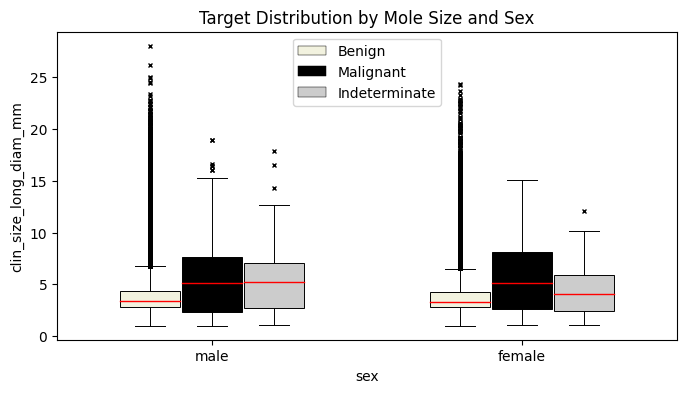

In [12]:
f_x = 'iddx_1'
f_y = 'clin_size_long_diam_mm' # 'clin_size_long_diam_mm'
split = 'sex'

box_distr(df_train, f_x, f_y, split, 'Target Distribution by Mole Size and Sex',  'upper center' )

1. Median 
- Male
    - 양성(Benign) : 중앙값은 약 3mm이다. 
    - 악성 (Malignant) : 중앙값은 약 5mm이다. 
    - Indeterminate : 중앙값은 약 5mm이다. 
- Female
    - 양성(Benign) : 중앙값은 약 3mm이다. 
    - 악성 (Malignant) : 중앙값은 약 5mm이다. 
    - Indeterminate : 중앙값은 약 4mm이다. 
    
2. Interquartile Range, IQR
- Male
    - 양성 병변의 분포 범위는 약 2-4mm 사이에 있다. 
    - 악성 병변은 양성보다 넓은 범위를 보이며, 약 2-7mm 사이에 있다. 
    - 불확정 병변의 분포 범위는 약 2-6mm 사이에 있다. 
- Female
    - 양성 병변의 분포 범위는 약 2-4mm 사이에 있다. 
    - 악성 병변은 양성보다 넓은 범위를 보이며, 약 2-7mm 사이에 있다. 
    - 불확정 병변의 분포 범위는 약 2-5mm 사이에 있다. 

3. Outiers
- 남성과 여성 모두에서 병변 크기가 큰 이상치가 발생한다. <br>
    특히 25mm에 이르는 병변의 이상치가 존재한다. 
 
3. Male과 Female 비교 
- **성별에 따른 분포 차이가 크게 나타나지 않으며** 양성 병변, 악성 병변, 불확정 병변 모두에서 남성과 여성 사이 분포가 유사하게 나타난다. 

## Visualize the Age Distribution according to the Location of the Lesion


'box_distr' Function를 사용하여 'df_train' Data Frame에서 'anatom_site_general'와 'age_approx'의 분포를 Visualize. <br>
'anatom_site_general'에 따라 'age_approx'가 어떻게 분포하는지 비교한다. <br>
병변 위치에 따라 나이가 어떻게 분포하는지 분석한다. 

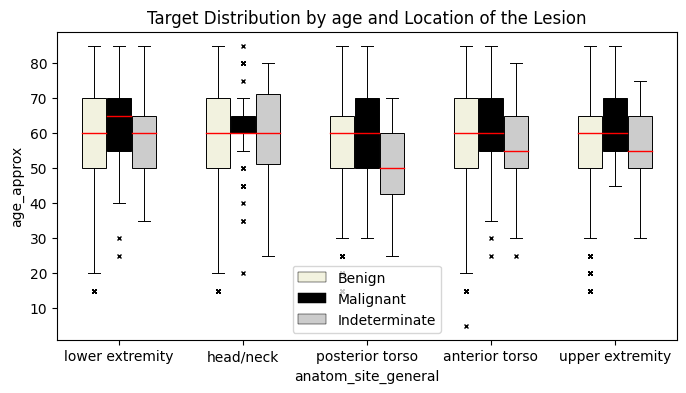

In [13]:
f_x = 'iddx_1'
f_y = 'age_approx' # 'clin_size_long_diam_mm'
split = 'anatom_site_general'

box_distr(df_train, f_x, f_y, split, 'Target Distribution by age and Location of the Lesion',  'lower center')

1. Median 
- Lower Extremity (하지)
    - 양성(Benign) : 중앙값은 약 60세이다. 
    - 악성 (Malignant) : 중앙값은 약 65세이다. 
    - Indeterminate : 중앙값은 약 60세이다. 
- Head & Neck (머리 & 목)
    - 양성(Benign) : 중앙값은 약 60세이다. 
    - 악성 (Malignant) : 중앙값은 약 60세이다. 
    - Indeterminate : 중앙값은 약 60세이다. 
- Posterior Torso(후면 몸통)
    - 양성(Benign) : 중앙값은 약 60세이다. 
    - 악성 (Malignant) : 중앙값은 약 60세이다. 
    - Indeterminate : 중앙값은 약 50세이다. 
- Anterior Torso(전면 몸통)
    - 양성(Benign) : 중앙값은 약 60세이다. 
    - 악성 (Malignant) : 중앙값은 약 60세이다. 
    - Indeterminate : 중앙값은 약 55세이다.
- Upper Extermity(상지)
    - 양성(Benign) : 중앙값은 약 60세이다. 
    - 악성 (Malignant) : 중앙값은 약 60세이다. 
    - Indeterminate : 중앙값은 약 55세이다. 
    
2. Interquartile Range, IQR
- 각 병변 위치에서 분포 범위는 약 40-70세 사이에 집중되어 있다. 

3. Outiers
- 머리 & 목 부위에서 발생한 병변의 이상치는 주로 매우 젊거나 매우 고령의 환자에게서 발생한 경우가 많다. <br>
    이 경우 일반적인 경우와 다를 수 있으므로 이에 대해 주의가 필요하다.
 
3. 나이와 병변 위치의 관계
- **병변 위치와 나이 간의 큰 차이가 나타나지 않기 때문에, 병변의 위치보다는 나이 자체가 병변의 성질에 더 중요한 요인이 될 수 있다.**

## Visualize the Distribution between Age and Gender based on the Size(Area) of the Lesion

'box_distr' Function을 사용해 'df_train' Data Frame에서 'tbp_lv_areMM2'을 'sex'에 따라 비교하여 Box Plot으로 Visualize. <br>
'tbp_lv_areaMM2'을 기준으로 나이와 성별 간의 분포를 비교한다. <br>
성별에 따른 병면 면적의 분포 차이가 있는지, 특정 성별에서 병변 면적이 더 큰 경향이 있는지 분석한다. 

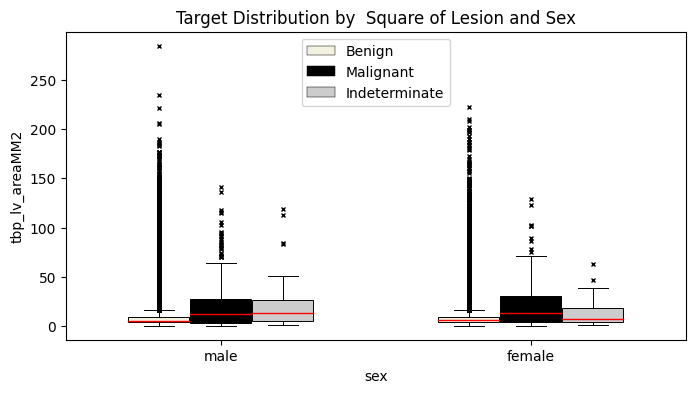

In [14]:
f_x = 'iddx_1'
f_y = 'tbp_lv_areaMM2' # Square of Injury
split = 'sex' 

box_distr(df_train, f_x, f_y, split, 'Target Distribution by  Square of Lesion and Sex',  'upper center')

1. Median 
- Male
    - 양성(Benign) : 중앙값이 거의 0에 가까운 매우 작은 값이다. 
    - 악성 (Malignant) : 중앙값은 약 10mm이다. 
    - Indeterminate : 중앙값은 약 10mm이다. 
- Female
    - 양성(Benign) : 중앙값이 거의 0에 가까운 매우 작은 값이다. 
    - 악성 (Malignant) : 중앙값은 약 10mm이다. 
    - Indeterminate : 중앙값은 약 5mm이다. 
    
2. Interquartile Range, IQR
- Male
    - 양성 병변의 분포 범위는 매우 좁고 중앙값이 거의 0에 가까운 병변이 많다. 
    - 악성 병변은 0mm에서 25mm 사이에 주로 분포하며, 더 큰 크기의 병변도 일부 나타납니다.
    - 불확정 병변의 분포 범위는 약 0-25mm 사이에 있다. 
- Female
    - 양성 병변의 분포 범위는 매우 좁고 중앙값이 거의 0에 가까운 병변이 많다. 
    - 악성 병변은 0mm에서 25mm 사이에 주로 분포하며, 더 큰 크기의 병변도 일부 나타납니다.
    - 불확정 병변의 분포 범위는 약 0-12mm 사이에 있다. 

3. Outiers
- 남성과 여성 모두에서 병변 면적이 큰 이상치가 발생한다. <br>

3. Male과 Female 비교 
- 양성(Benign)의 중앙값이 남성과 여성 모두에서 매우 작은 값을 가지며, 거의 0에 가까운 값으로 나타난다. 
    이는 **대부분의 양성 병변이 매우 작은 크기로 발생함**을 의미한다. 
- 악성(Malignant)과 불확정(Indeterminate)의 분포와 중앙값은 남성과 여성 모두에서 유사하게 나타난다. 
    **성별에 따른 병변 면적 차이는 크지 않다고 할 수 있다.**

4. 병변 면적과 병변 성질의 관계
- **악성 병변의 중앙값이 양성 병변에 비해 크게 나타난다. 따라서 면적이 큰 병변일수록 악성이 가능성이 높아진다.**

## Visualize Differences in Lesion Color Irregularities by Male and Female

'box_distr' Function을 사용해 'df_train' Data Frame에서 'tbp_lv_color_std_mean'을 'sex'에 따라 비교해 Box Plot으로 Visualize. <br>
'sex'에 따라 분할된 그룹 내에서, 'tbp_lv_color_std_mean'의 분포를 'iddx_1'를 기준으로 비교한다. <br>
성별에 따른 병변 색상 불규칙성의 차이가 있는지, 특정 성별에서 색상 불규칙성이 높은 경향이 있는지 분석한다. 

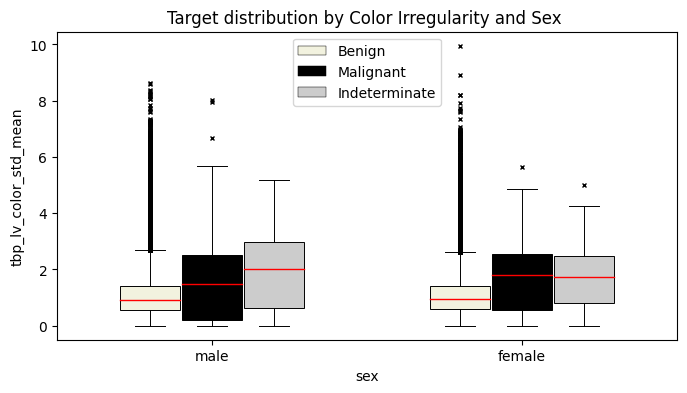

In [15]:
# 색상의 불규칙성은 병변 내 Variance로 계산되며 값이 클수록 불규칙하게 분포되어 있음을 의미한다. 
f_x = 'iddx_1'
f_y = 'tbp_lv_color_std_mean' # Color Irregularity, Calculated as the variance of colors within the lesion's boundary.
split = 'sex' 

t = 'Target distribution by Color Irregularity and Sex '
box_distr(df_train, f_x, f_y, split, t, 'upper center')

1. Median 
- Male
    - 양성(Benign) : 중앙값은 약 1.5이다. 
    - 악성 (Malignant) : 중앙값은 약 1.7이다. 
    - Indeterminate : 중앙값은 약 2이다. 
- Female
    - 양성(Benign) : 중앙값은 약 1.5이다
    - 악성 (Malignant) : 중앙값은 약 2이다. 
    - Indeterminate : 중앙값은 약 2이다
    
2. Interquartile Range, IQR
- Male
    - 양성 병변의 분포 범위는 약 0.5-2 사이에 있다. 
    - 악성 병변의 분포 범위는 약 1-3 사이에 있으며, 더 높은 색상 불규칙성을 보인다. 
    - 불확정 병변의 분포 범위는 약 0.5-3.5 사이에 있다.  
- Female
    - 양성 병변의 분포 범위는 약 0.5-2 사이에 있다. 
    - 악성 병변의 분포 범위는 약 1-3 사이에 있으며, 더 높은 색상 불규칙성을 보인다. 
    - 불확정 병변의 분포 범위는 약 0.5-3 사이에 있다.  

3. Outiers
- 남성과 여성 모두에서 병변의 색상 불규칙성이 매우 높은 이상치가 발견된다.
- 특히 8 이상의 색상 불규칙성을 가지는 병변들이 다수 나타나며, 이는 병변이 매우 불규칙한 색상 Pattern을 가지고 있음을 의미한다. 
- 색상 불규칙성이 클수록 병변이 악성일 가능성이 높다.

3. Male과 Female 비교 
- 양성(Benign)의 중앙값이 남성과 여성 모두에서 비슷한 값으로 나타나며, 색상 불규칙성이 비교적 낮다. 
- 악성(Malignant)과 불확정(Indeterminate)의 중앙값과 분포는 남성과 여성 모두에서 유사하게 나타나며, 성별에 따른 큰 차이는 없다고 볼 수 있다.

4. 병변 색상의 불규칙성과 병변 성질의 관계
- 악성 및 불확정 병변의 중앙값이 양성 병변보다 높고, 더 넓은 분포 범위를 보이는 점은 주목할 만하다. 
    이는 **색상 불규칙성이 높을수록 병변이 악성일 가능성이 높다는 것을 의미**한다.
- 특히 색상 불규칙성이 매우 높은 이상치들은 대부분 악성 병변에서 나타나므로 이를 진단의 중요한 지표로 활용할 수 있다.

## Visualize the Distribution of Lesion Boundary Irregularities by Male and Female

'box_distr' Function를 사용하여 'df_train' Data Frame에서 'tbp_lv_area_perim_ratio'을 'sex'에 따라 비교하고 Box Plot으로 Visualize. <br>
성별에 따른 병변 경계 불규칙성의 분포를 분석한다. 

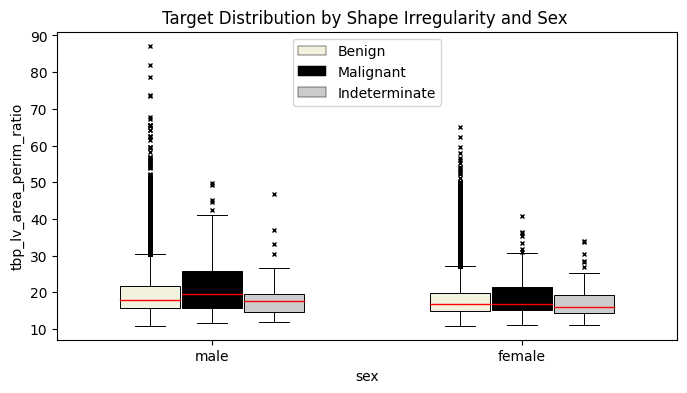

In [16]:
f_x = 'iddx_1'
f_y = 'tbp_lv_area_perim_ratio' # Border Jaggedness, The ratio between lesions perimeter and area. 
# Circular lesions will have low values; irregular shaped lesions will have higher values. Values range 0-10.+
split = 'sex' 

t = 'Target Distribution by Shape Irregularity and Sex '
box_distr(df_train, f_x, f_y, split, t, 'upper center')

1. Outliers
- 남성과 여성 모두에서 병변의 경계 불규칙성이 매우 높은 이상치가 발견된다. 
- 특히 40 이상의 경계 불규칙성을 가지는 병변들이 다수 나타나며, 이는 병변이 매우 불규칙한 경계를 가지고 있음을 의미한다. 
- 이러한 이상치는 대부분 악성(Malignant) 또는 불확정(Indeterminate)에서 발생하며, 이는 경계 불규칙성이 클수록 병변이 악성일 가능성이 높다. 

2. Male과 Female 비교
- 양성(Benign)의 중앙값이 남성과 여성 모두에서 유사하게 나타난다. <br>
    이는 경계 불규칙성이 비교적 낮다는 것을 의미한다.
- 악성(Malignant)과 불확정(Indeterminate)의 중앙값과 분포도 남성과 여성 모두에서 유사하게 나타나며, 성별에 따른 큰 차이는 없다고 볼 수 있다.

3. 병변 경계 불규칙성과 병변 성질의 관계
- 악성 및 불확정 병변의 중앙값이 양성 병변보다 높고, 더 넓은 분포 범위를 보이는 점은 주목할 만하다. <br>
    이는 **경계 불규칙성이 높을수록 병변이 악성일 가능성이 높다는 것을 의미**한다. 
- 특히 경계 불규칙성이 매우 높은 이상치들은 대부분 악성 병변에서 나타나므로, 이를 진단의 중요한 지표로 활용할 수 있다. 

## Visualize the Distribution of Contrast between Gender-Specific Lesions and Surrounding Skin

'box_distr' Function를 사용하여 'df_train' Data Frame에서 'tbp_lv_deltaLBnorm'를 'sex'에 따라 비교하고 Box Plot으로 Visualize. <br>
성별에 따른 병변과 주변 피부 간 대비의 분포를 비교한다. 

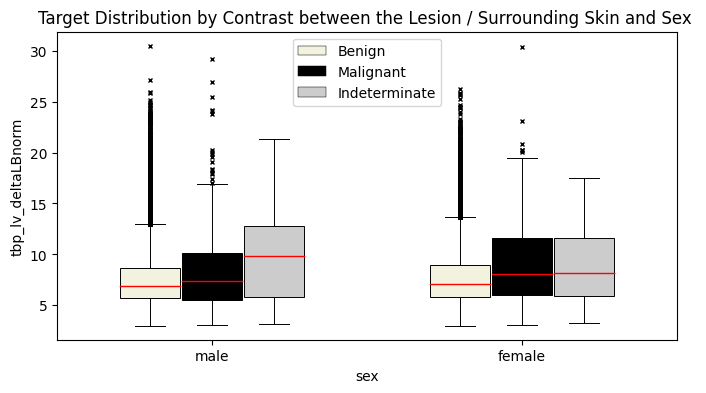

In [17]:
f_x = 'iddx_1'
f_y = 'tbp_lv_deltaLBnorm' # Contrast between the lesion and surrounding skin.
split = 'sex' 

t = 'Target Distribution by Contrast between the Lesion / Surrounding Skin and Sex '
box_distr(df_train, f_x, f_y, split, t, 'upper center')

1. Outliers
- 남성과 여성 모두에서 병변 대비가 매우 높은 이상치가 발견된다.  
- 특히 15 이상의 병변 대비를 가지는 병변들이 다수 나타나며, 이는 병변과 주변 피부 간의 색상 대비가 매우 크다는 것을 의미한다. 
- 이러한 이상치는 대부분 악성(Malignant) 또는 불확정(Indeterminate)에서 발생하며, 이는 대비가 클수록 병변이 악성일 가능성이 높다. 

2. Male과 Female 비교
- 양성(Benign)의 중앙값이 남성과 여성 모두에서 유사하게 나타난다. <br>
    이는 병변과 피부 간의 대비가 비교적 낮다는 것을 의미한다.
- 악성(Malignant)과 불확정(Indeterminate)의 중앙값과 분포는 남성과 여성 모두에서 유사하게 나타나며, 성별에 따른 큰 차이는 없다.

3. 병변 대비와 병변 성질의 관계
- 악성 및 불확정 병변의 중앙값이 양성 병변보다 높고, 더 넓은 분포 범위를 보이는 점은 주목할 만하다. <br>
    이는 **병변과 주변 피부 간 대비가 클수록 병변이 악성일 가능성이 높다는 것을 의미**한다. 
- 특히 병변 대비가 매우 높은 이상치들은 대부분 악성 병변에서 나타나므로, 이를 진단의 중요한 지표로 활용할 수 있다. 

## Numeral Variables 2D Scatter Plot

Compare Numeral Variables in pairs to create a 2d Scatter Plot that initiates distribution between benign and malignant lesions. <br>
Numerical Variables를 쌍으로 비교해 양성과 악성 병변 사이의 분포를 시작화 하는 2d Scatter Plot를 생성한다. 

In [ ]:
# Numerical Variables 
numerical_features = ['clin_size_long_diam_mm', 'tbp_lv_areaMM2', 'tbp_lv_color_std_mean', 'tbp_lv_eccentricity',
                      'tbp_lv_area_perim_ratio',  
                      'tbp_lv_deltaLBnorm',  'tbp_lv_minorAxisMM' , 'tbp_lv_Hext',
                      'tbp_lv_A', 'tbp_lv_Aext', 'tbp_lv_B', 'tbp_lv_Bext',
                      'tbp_lv_C', 'tbp_lv_Cext', 'tbp_lv_H', 'tbp_lv_L', 'tbp_lv_Lext']

# 'numerical_features'의 각 Variables가 어떤 의미를 갖는지 설명한다. 
aa = ['Size',  'Area', 'Color irregularity', 
      'Shape irregularity ',  
      'Contrast between the lesion and surrounding skin', 'Eccentricity', 'Smallest lesion diameter' , 
      'Hue outside lesion',
      'A inside lesion', 'tbp_lv_Aext', 'B inside lesion', 'B outside lesion',
      'tbp_lv_C', 'tbp_lv_Cext', 'tbp_lv_H', 'tbp_lv_L', 'L outside lesion']

# 'numerical_features'와 'aa'를 Dict로 결합해 'data' Variable에 저장한다. 
data = {'numerical_features': numerical_features,
        'definitions': aa}

feature_definitions =  pd.DataFrame(data)

gs = 100
n = 2 # Num of Columns
a = 0 

tr = df_train
tr0 = tr[tr.target == 0] # 양성(Benign)
tr1 = tr[tr.target == 1] # 음성(Malignant)
lsize = 12
m = 1
base_color = '#FA8072'
color_notdefault = base_color 
color_default = 'black'

colorlabels ='black' 
                   
fontsize = 22
Title_size = 22
Label_size = 16
s = 20
p = ['#D3D3D3', '#FF0000']
plt.figure(figsize = (18, 7))
plt.suptitle("Benign VS Malignant", fontsize = 15, y = 1.015)

for i in numerical_features[:-1]:
    # plt.figure(figsize = (15, 4)) 
    a = a + 1
    for j in numerical_features[a:]:
        ax1 = feature_definitions[feature_definitions.numerical_features == i].definitions.to_string(index = False)
        ax2 = feature_definitions[feature_definitions.numerical_features == j].definitions.to_string(index = False)
        
        x_min = pd.concat([tr0[i], tr1[i]]).min()
        x_max = pd.concat([tr0[i], tr1[i]]).max()
        y_min = pd.concat([tr0[j], tr1[j]]).min()
        y_max = pd.concat([tr0[j], tr1[j]]).max()
        
        plt.subplot(1, n, m)
        # plt.rcParams['axes.facecolor'] = 'lightgrey'
        sns.scatterplot(x = tr0[i], y = tr0[j], color = color_default , s = s, alpha = 0.4)  # Not-Default
        sns.scatterplot(x = tr1[i], y = tr1[j], color = color_notdefault, s = s, alpha = 0.7)  # Default  
        
        plt.title(f'', color = 'black', fontsize = 10)
        plt.tick_params(axis = 'x', labelsize = lsize)
        plt.tick_params(axis = 'y', labelsize = lsize)
        plt.xlim([x_min, x_max])
        plt.ylim([y_min, y_max])
        plt.xlabel(f'{ax1} \n "{i}"', fontsize = Label_size, color = colorlabels)
        plt.ylabel(f'{ax2} \n "{j}"', fontsize = Label_size, color = colorlabels) 
        # plt.xlabel()
        # plt.ylabel() 
        plt.grid(color = 'lightgray')
        plt.rc('axes',edgecolor = 'black')
        plt.legend(['Benign', 'Malignant'], loc = 'upper right', prop = {'size': 10}, markerscale = 2, shadow = False, 
                   framealpha = 0.8, facecolor = 'white', reverse = False)
        current_values_x = plt.gca().get_xticks()
        current_values_y = plt.gca().get_yticks()
        if current_values_x.max() >= 1000:
            plt.gca().set_xticklabels(['{:,.0f}'.format(z).replace(',', ' ') for z in current_values_x])
        if current_values_y.max() >= 1000:
            plt.gca().set_yticklabels(['{:,.0f}'.format(z).replace(',', ' ') for z in current_values_y])
        m = -m + 3
        if m == 1:
            plt.show()
            plt.figure(figsize = (18, 7))

## Location of the Lesion on the Patient's Body

'patient_id'별로 피부 병변의 위치를 Visualize 한다. <br>
'df_train' Data Frame에서 가장 빈번하게 등장하는 상위 24명의 ID를 추출, 각 환자의 피부 병변의 위치를 Hexbin Plot으로 Visualize. <br>
한 환자에게 여러 개의 병변이 발생하는 경우, 그 병변들의 위치를 비교하고 분석할 수 있다. 

In [ ]:
k = 8  # Num of Row 
l = 3 # Num of Columns
n = k * l
# df = df_train.query('age_approx <= 30')
most_common_patients = df_train['patient_id'].value_counts().head(n)
most_common_patients
m = 1
fig = plt.figure(figsize = (15, 60))
for patient_id in most_common_patients.index:
    plt.subplot(k, l, m)
    d = df_train.query('patient_id == @patient_id')
    plt.hexbin(data = d, x = 'tbp_lv_x', y = 'tbp_lv_y',  gridsize = int(75 * (len(d) / 9184) ** 0.20), cmap = 'CMRmap', bins = 'log', alpha = 1)
    
    s = d[d.patient_id == patient_id].target.sum()
    as1 = d[d.patient_id == patient_id].sex.unique()[0]
    age = d[d.patient_id == patient_id].age_approx.unique()[0]
    plt.title(f'{patient_id}, {as1}, age = {int(age)}  \n num of tumors = {s}')
    # plt.rcParams['axes.facecolor'] = 'lightgrey'
    # plt.grid(color='white')
    plt.grid()
    m = m + 1
    fig.patch.set_linewidth(5)
    fig.patch.set_edgecolor('#000000') 
    fig.patch.set_facecolor('#dddddd')
plt.show()

## Exploratory Data Analysis Conclusion

As a result of EDA analysis, features of high importance are as follows. <br>

|Features|||
|:---|:---|:---|
|Size|'clin_size_long_diam_mm'|크기는 병변의 긴 직경을 나타내며 양성 병변과 악성 병변 간 분포 차이를 보여준다. <br> 악성 병변은 크기가 더 큰 경향이 있다.|
|Area|'tbp_lv_areaMM2'|병변의 면적은 크기와 밀접하게 연관이 되어있다. <br> 크기가 클수록 면적도 증가하는 경향이 있으며 악성 병변은 면적이 더 큰 경우가 많다.|
|Color Irregularity|'tbp_lv_color_std_mean'|악성 병변은 양성 병변에 비해 색상 불규칙성이 더 높을 가능성이 있다. <br> 악성 병변이 더 다양한 색상 변화를 보일 수 있기 때문이다.|
|Shape Irregularity|'tbp_lv_area_perim_ratio'|악성 병변은 모양이 불규칙한 경우가 많다. <br> 병변의 경계가 불규칙적이거나 비대칭적인 경우이다.|
|Contrast between the Lesion and Surrounding Skin|'tbp_lv_deltaLBnorm'|악성 병변은 주변 피부와 대비가 더 뚜렷할 가능성이 있다. <br> 이 대비는 병변이 피부에서 어떻게 두드러지는지를 나타낸다.|
|Eccentricity|'tbp_lv_eccentricity'|편심률은 병변의 타원형 정도를 나타내며 모양 불규칙성과 유사한 특징을 가진다. <br> 악성 병변은 더 비대칭적일 수 있다.|
|Sex|'sex'|성별은 병변의 발생 및 특성과 관련된 잠재적 변수를 나타낸다.|
|Age|'age_approx'|나이는 병변의 발생 위험과 밀접하게 관련된다. <br> 특정 연령대에서 악성 병변이 많이 발생할 수 있다.|

# Modeling

## Pre-Trained Models, Generating Image Prediction Results

Pre-Train EffNet, Vision Transformer Model를 사용해 Image 예측 결과를 생성한다.

In [20]:
!python /kaggle/input/isic-script-inference-effnetv1b0-f313ae/main.py /kaggle/input/isic-pytorch-training-baseline-image-only/AUROC0.5171_Loss0.3476_epoch35.bin
!mv submission.csv submission_effnetv1b0.csv

BEST_WEIGHT = /kaggle/input/isic-pytorch-training-baseline-image-only/AUROC0.5171_Loss0.3476_epoch35.bin
100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.03it/s]


In [21]:
!python /kaggle/input/isic-script-inference-eva02/main.py /kaggle/input/isic-pytorch-training-baseline-eva02/AUROC0.5177_Loss0.2829_epoch7.bin
!mv submission.csv submission_eva02.csv

BEST_WEIGHT = /kaggle/input/isic-pytorch-training-baseline-eva02/AUROC0.5177_Loss0.2829_epoch7.bin
100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  2.64it/s]


## Path and Parameter Setting

In [22]:
root = Path('/kaggle/input/isic-2024-challenge')

train_path = root / 'train-metadata.csv'
test_path = root / 'test-metadata.csv'
subm_path = root / 'sample_submission.csv'

id_col = 'isic_id'
target_col = 'target'
group_col = 'patient_id'

err = 1e-5 # 계산 시 0으로 나누는 것을 방지하기 위해 사용하는 작은 상수
sampling_ratio = 0.01 # Class 불균형을 조정하기 위한 Sampling 비율
seed = 42 # 난수 생성의 일관성을 유지하기 위한 Random Seed 값 

## Feature Column Setting

In [23]:
# 기존의 수치형 Features의 List
num_cols = [
    'age_approx',                        
    'clin_size_long_diam_mm',            
    'tbp_lv_A',                          
    'tbp_lv_Aext',                       
    'tbp_lv_B',                          
    'tbp_lv_Bext',                       
    'tbp_lv_C',                          
    'tbp_lv_Cext',                       
    'tbp_lv_H',                          
    'tbp_lv_Hext',                       
    'tbp_lv_L',                          
    'tbp_lv_Lext',                       
    'tbp_lv_areaMM2',                    
    'tbp_lv_area_perim_ratio',           
    'tbp_lv_color_std_mean',             
    'tbp_lv_deltaA',                     
    'tbp_lv_deltaB',                     
    'tbp_lv_deltaL',                     
    'tbp_lv_deltaLB',                    
    'tbp_lv_deltaLBnorm',                
    'tbp_lv_eccentricity',               
    'tbp_lv_minorAxisMM',                
    'tbp_lv_nevi_confidence',            
    'tbp_lv_norm_border',                
    'tbp_lv_norm_color',                 
    'tbp_lv_perimeterMM',                
    'tbp_lv_radial_color_std_max',       
    'tbp_lv_stdL',                       
    'tbp_lv_stdLExt',                    
    'tbp_lv_symm_2axis',                 
    'tbp_lv_symm_2axis_angle',           
    'tbp_lv_x',                          
    'tbp_lv_y',                          
    'tbp_lv_z',                          
]

In [24]:
# 기존 Features를 조합해서 만든 새로운 Numerical Features
new_num_cols = [
    'lesion_size_ratio',             # tbp_lv_minorAxisMM      / clin_size_long_diam_mm
    'lesion_shape_index',            # tbp_lv_areaMM2          / tbp_lv_perimeterMM ** 2
    'hue_contrast',                  # abs(tbp_lv_H            - tbp_lv_Hext)
    'luminance_contrast',            # abs(tbp_lv_L            - tbp_lv_Lext)
    'lesion_color_difference',       # sqrt(tbp_lv_deltaA **2  + tbp_lv_deltaB ** 2 + tbp_lv_deltaL ** 2)  
    'border_complexity',             # tbp_lv_norm_border      + tbp_lv_symm_2axis
    'color_uniformity',              # tbp_lv_color_std_mean   / tbp_lv_radial_color_std_max

    'position_distance_3d',          # sqrt(tbp_lv_x ** 2 + tbp_lv_y ** 2 + tbp_lv_z ** 2)
    'perimeter_to_area_ratio',       # tbp_lv_perimeterMM      / tbp_lv_areaMM2
    'area_to_perimeter_ratio',       # tbp_lv_areaMM2          / tbp_lv_perimeterMM
    'lesion_visibility_score',       # tbp_lv_deltaLBnorm      + tbp_lv_norm_color
    'symmetry_border_consistency',   # tbp_lv_symm_2axis       * tbp_lv_norm_border
    'consistency_symmetry_border',   # tbp_lv_symm_2axis       * tbp_lv_norm_border / (tbp_lv_symm_2axis + tbp_lv_norm_border)

    'color_consistency',             # tbp_lv_stdL             / tbp_lv_Lext
    'consistency_color',             # tbp_lv_stdL * tbp_lv_Lext / (tbp_lv_stdL + tbp_lv_Lext)
    'size_age_interaction',          # clin_size_long_diam_mm  * age_approx
    'hue_color_std_interaction',     # tbp_lv_H                * tbp_lv_color_std_mean
    'lesion_severity_index',         # (tbp_lv_norm_border     + tbp_lv_norm_color + tbp_lv_eccentricity) / 3
    'shape_complexity_index',        # border_complexity       + lesion_shape_index
    'color_contrast_index',          # tbp_lv_deltaA + tbp_lv_deltaB + tbp_lv_deltaL + tbp_lv_deltaLBnorm

    'log_lesion_area',               # log(tbp_lv_areaMM2 + 1)
    'normalized_lesion_size',        # clin_size_long_diam_mm  / age_approx
    'mean_hue_difference',           # (tbp_lv_H + tbp_lv_Hext) / 2
    'std_dev_contrast',              # sqrt((tbp_lv_deltaA ** 2 + tbp_lv_deltaB ** 2 + tbp_lv_deltaL ** 2) / 3)
    'color_shape_composite_index',   # (tbp_lv_color_std_mean + tbp_lv_area_perim_ratio + tbp_lv_symm_2axis) / 3
    'lesion_orientation_3d',         # arctan2(tbp_lv_y, tbp_lv_x)
    'overall_color_difference',      # (tbp_lv_deltaA + tbp_lv_deltaB + tbp_lv_deltaL) / 3
]

## Categorical and Special Column Settings

'cat_cols' : Categorical Data Columns로 OneHot-Encoding이 필요하다. <br>
'norm_cols' : 환자 기준으로 정규화 된 Feature들의 Columns로 각 Numerical Feature는 환자 Group 내에서 정규화된다. <br>
'special_cols' : 특수한 Feature들의 List <br>
'image_cols' : Image Model의 예측 결과로 생성된 Columns <br>

In [25]:
# Categorical Columns (Features)
cat_cols = ['sex', 'anatom_site_general', 'tbp_tile_type', 'tbp_lv_location', 'tbp_lv_location_simple', 'attribution']

# Normalized Columns, 환자 기준으로 정규화 된 Numerical Features
norm_cols = [f'{col}_patient_norm' for col in num_cols + new_num_cols]

# Special Columns, 특수한 Features 
special_cols = ['count_per_patient']

# Image Columns, Image Model에서 생성된 예측 결과를 추가한 Features
image_col = ['target_effnetv1b0', 'target_eva02']

In [26]:
# All feature columns
feature_cols = num_cols + new_num_cols + cat_cols + norm_cols + special_cols + image_col 

## Data Preprocess Function
Categorical Variables를 OneHot-Encoding해 'new_cat_cols' Column에 저장한다. <br>
Image Model의 예측 결과를 'target_effnetv1b0', 'target_eva02'라는 새로운 Column로 Train Data, Test Data에 추가한다. <br>
기존 'cat_cols'을 제거하고 Encoding 된 새로운 Columns 'new_cat_cols'로 대체해 'feature_cols'에 Update 한다.

In [27]:
def preprocess(df_train, df_test):
    global cat_cols, feature_cols 
    
    # OneHot-Encoding for Categorical Features
    encoder = OneHotEncoder(sparse_output = False, dtype = np.int32, handle_unknown = 'ignore')
    encoder.fit(df_train[cat_cols])
    
    new_cat_cols = [f'onehot_{i}' for i in range(len(encoder.get_feature_names_out()))]

    df_train[new_cat_cols] = encoder.transform(df_train[cat_cols])
    df_train[new_cat_cols] = df_train[new_cat_cols].astype('category')

    df_test[new_cat_cols] = encoder.transform(df_test[cat_cols])
    df_test[new_cat_cols] = df_test[new_cat_cols].astype('category')
    
    # Add Image Prediction Features
    # effnetv1b0
    df_eff = pd.read_csv("/kaggle/input/isic-inference-effnetv1b0-for-training-data/train_effnetv1b0.csv")
    df_train["target_effnetv1b0"] = df_eff["target_effnetv1b0"]

    df_eff = pd.read_csv("/kaggle/input/isic-tabular-model-image-model-features/submission_effnetv1b0.csv")
    df_test["target_effnetv1b0"] = df_eff["target"]
    
    # eva02
    df_eva = pd.read_csv("/kaggle/input/isic-inference-eva02-for-training-data/train_eva02.csv")
    df_train["target_eva02"] = df_eva["target_eva02"]

    df_eva = pd.read_csv("/kaggle/input/isic-tabular-model-image-model-features/submission_eva02.csv")
    df_test["target_eva02"] = df_eva["target"]

    # Remove Original Categorical Columns and Replace with Encoded Ones
    for col in cat_cols:
        feature_cols.remove(col)

    feature_cols.extend(new_cat_cols)
    cat_cols = new_cat_cols
    
    # Ensure image columns are in feature_cols
    for col in image_col:
        if col not in feature_cols:
            feature_cols.append(col)
    
    return df_train, df_test

## Data Read Function

'pl.read_csv'로 Data를 읽어온다. <br>
새로운 Numerical Feature, 특수 Feature, 환자당 Sample 수와 정규화 된 Feature를 생성한다. <br>
결측치는 중앙값으로 대체한다. <br>
Categorical Data를 'Catecorical'로 변환해 Memory를 절약한다. <br>
DataFrame을 Pandas 형식으로 변환 후 반환한다.

In [28]:
def read_data(path):
    return (
        pl.read_csv(path)
        .with_columns(
            pl.col('age_approx').cast(pl.String).replace('NA', np.nan).cast(pl.Float64),
        )
        .with_columns(
            pl.col(pl.Float64).fill_nan(pl.col(pl.Float64).median()), 
        )
        .with_columns(
            lesion_size_ratio              = pl.col('tbp_lv_minorAxisMM') / pl.col('clin_size_long_diam_mm'),
            lesion_shape_index             = pl.col('tbp_lv_areaMM2') / (pl.col('tbp_lv_perimeterMM') ** 2),
            hue_contrast                   = (pl.col('tbp_lv_H') - pl.col('tbp_lv_Hext')).abs(),
            luminance_contrast             = (pl.col('tbp_lv_L') - pl.col('tbp_lv_Lext')).abs(),
            lesion_color_difference        = (pl.col('tbp_lv_deltaA') ** 2 + pl.col('tbp_lv_deltaB') ** 2 + pl.col('tbp_lv_deltaL') ** 2).sqrt(),
            border_complexity              = pl.col('tbp_lv_norm_border') + pl.col('tbp_lv_symm_2axis'),
            color_uniformity               = pl.col('tbp_lv_color_std_mean') / (pl.col('tbp_lv_radial_color_std_max') + err),
        )
        .with_columns(
            position_distance_3d           = (pl.col('tbp_lv_x') ** 2 + pl.col('tbp_lv_y') ** 2 + pl.col('tbp_lv_z') ** 2).sqrt(),
            perimeter_to_area_ratio        = pl.col('tbp_lv_perimeterMM') / pl.col('tbp_lv_areaMM2'),
            area_to_perimeter_ratio        = pl.col('tbp_lv_areaMM2') / pl.col('tbp_lv_perimeterMM'),
            lesion_visibility_score        = pl.col('tbp_lv_deltaLBnorm') + pl.col('tbp_lv_norm_color'),
            combined_anatomical_site       = pl.col('anatom_site_general') + '_' + pl.col('tbp_lv_location'),
            symmetry_border_consistency    = pl.col('tbp_lv_symm_2axis') * pl.col('tbp_lv_norm_border'),
            consistency_symmetry_border    = pl.col('tbp_lv_symm_2axis') * pl.col('tbp_lv_norm_border') / (pl.col('tbp_lv_symm_2axis') + pl.col('tbp_lv_norm_border')),
        )
        .with_columns(
            color_consistency              = pl.col('tbp_lv_stdL') / pl.col('tbp_lv_Lext'),
            consistency_color              = pl.col('tbp_lv_stdL') * pl.col('tbp_lv_Lext') / (pl.col('tbp_lv_stdL') + pl.col('tbp_lv_Lext')),
            size_age_interaction           = pl.col('clin_size_long_diam_mm') * pl.col('age_approx'),
            hue_color_std_interaction      = pl.col('tbp_lv_H') * pl.col('tbp_lv_color_std_mean'),
            lesion_severity_index          = (pl.col('tbp_lv_norm_border') + pl.col('tbp_lv_norm_color') + pl.col('tbp_lv_eccentricity')) / 3,
            shape_complexity_index         = pl.col('border_complexity') + pl.col('lesion_shape_index'),
            color_contrast_index           = pl.col('tbp_lv_deltaA') + pl.col('tbp_lv_deltaB') + pl.col('tbp_lv_deltaL') + pl.col('tbp_lv_deltaLBnorm'),
        )
        .with_columns(
            log_lesion_area                = (pl.col('tbp_lv_areaMM2') + 1).log(),
            normalized_lesion_size         = pl.col('clin_size_long_diam_mm') / pl.col('age_approx'),
            mean_hue_difference            = (pl.col('tbp_lv_H') + pl.col('tbp_lv_Hext')) / 2,
            std_dev_contrast               = ((pl.col('tbp_lv_deltaA') ** 2 + pl.col('tbp_lv_deltaB') ** 2 + pl.col('tbp_lv_deltaL') ** 2) / 3).sqrt(),
            color_shape_composite_index    = (pl.col('tbp_lv_color_std_mean') + pl.col('tbp_lv_area_perim_ratio') + pl.col('tbp_lv_symm_2axis')) / 3,
            lesion_orientation_3d          = pl.arctan2(pl.col('tbp_lv_y'), pl.col('tbp_lv_x')),
            overall_color_difference       = (pl.col('tbp_lv_deltaA') + pl.col('tbp_lv_deltaB') + pl.col('tbp_lv_deltaL')) / 3,
        )
        .with_columns(
            symmetry_perimeter_interaction = pl.col('tbp_lv_symm_2axis') * pl.col('tbp_lv_perimeterMM'),
            comprehensive_lesion_index     = (pl.col('tbp_lv_area_perim_ratio') + pl.col('tbp_lv_eccentricity') + pl.col('tbp_lv_norm_color') + pl.col('tbp_lv_symm_2axis')) / 4,
            color_variance_ratio           = pl.col('tbp_lv_color_std_mean') / pl.col('tbp_lv_stdLExt'),
            border_color_interaction       = pl.col('tbp_lv_norm_border') * pl.col('tbp_lv_norm_color'),
            border_color_interaction_2     = pl.col('tbp_lv_norm_border') * pl.col('tbp_lv_norm_color') / (pl.col('tbp_lv_norm_border') + pl.col('tbp_lv_norm_color')),
            size_color_contrast_ratio      = pl.col('clin_size_long_diam_mm') / pl.col('tbp_lv_deltaLBnorm'),
            age_normalized_nevi_confidence = pl.col('tbp_lv_nevi_confidence') / pl.col('age_approx'),
            age_normalized_nevi_confidence_2 = (pl.col('clin_size_long_diam_mm')**2 + pl.col('age_approx')**2).sqrt(),
            color_asymmetry_index          = pl.col('tbp_lv_radial_color_std_max') * pl.col('tbp_lv_symm_2axis'),
        )
        .with_columns(
            volume_approximation_3d        = pl.col('tbp_lv_areaMM2') * (pl.col('tbp_lv_x')**2 + pl.col('tbp_lv_y')**2 + pl.col('tbp_lv_z')**2).sqrt(),
            color_range                    = (pl.col('tbp_lv_L') - pl.col('tbp_lv_Lext')).abs() + (pl.col('tbp_lv_A') - pl.col('tbp_lv_Aext')).abs() + (pl.col('tbp_lv_B') - pl.col('tbp_lv_Bext')).abs(),
            shape_color_consistency        = pl.col('tbp_lv_eccentricity') * pl.col('tbp_lv_color_std_mean'),
            border_length_ratio            = pl.col('tbp_lv_perimeterMM') / (2 * np.pi * (pl.col('tbp_lv_areaMM2') / np.pi).sqrt()),
            age_size_symmetry_index        = pl.col('age_approx') * pl.col('clin_size_long_diam_mm') * pl.col('tbp_lv_symm_2axis'),
            index_age_size_symmetry        = pl.col('age_approx') * pl.col('tbp_lv_areaMM2') * pl.col('tbp_lv_symm_2axis'),
        )
        .with_columns(
            ((pl.col(col) - pl.col(col).mean().over('patient_id')) / (pl.col(col).std().over('patient_id') + err)).alias(f'{col}_patient_norm') for col in (num_cols + new_num_cols)
        )
        .with_columns(
            count_per_patient = pl.col('isic_id').count().over('patient_id'),
        )
        .with_columns(
            pl.col(cat_cols).cast(pl.Categorical),
        )
        .to_pandas()
        .set_index(id_col)
    )

## Data Read & Pre-Processing

In [29]:
# Data Read
df_train = read_data(train_path)
df_test = read_data(test_path)
df_subm = pd.read_csv(subm_path, index_col = id_col)

# Data Pre-Processing
df_train, df_test = preprocess(df_train, df_test)

## LightGBM Model Hyperarameter Setting

In [30]:
lgb_params = {
    'objective':        'binary',
    'verbosity':        -1,
    'n_iter':           200,
    'boosting_type':    'gbdt',
    'random_state':     seed,
    'lambda_l1':        0.08758718919397321, 
    'lambda_l2':        0.0039689175176025465, 
    'learning_rate':    0.03231007103195577, 
    'max_depth':        4, 
    'num_leaves':       103, 
    'colsample_bytree': 0.8329551585827726, 
    'colsample_bynode': 0.4025961355653304, 
    'bagging_fraction': 0.7738954452473223, 
    'bagging_freq':     4, 
    'min_data_in_leaf': 85, 
    'scale_pos_weight': 2.7984184778875543,
}

## LightGBM Model Pipeline

Pipline을 사용해 Data Sampling과 Model Train을 연결한다. <br>
Oversampling, Undersampling을 통해 Class 불균형을 조정한 후 LightGBM Model을 Train한다.

In [31]:
lgb_model = Pipeline([
    ('sampler_1', RandomOverSampler(sampling_strategy = 0.003, random_state = seed)),
    ('sampler_2', RandomUnderSampler(sampling_strategy = sampling_ratio, random_state = seed)),
    ('classifier', lgb.LGBMClassifier(**lgb_params)),
])

## StratifiedGroupKFold

StratifiedGroupKFold(교차 검증)을 사용해 5-Fold 교차 검증을 설정한다. <br>
이후 'cross_val_score' Function을 사용해 Model의 성능을 평가하고, ROC AUC Score의 평균을 출력한다.

In [32]:
# 'X', 'y' = Model에 사용할 Feature와 Target Data를 설정한다
X = df_train[feature_cols]
y = df_train[target_col]
# 'group' = 환자 ID 별로 Group화 된 Data를 설정한다. 
groups = df_train[group_col]
cv = StratifiedGroupKFold(5, shuffle = True, random_state = seed)

val_score = cross_val_score(
    estimator = lgb_model, 
    X = X, y = y, 
    cv = cv, 
    groups = groups,
    scoring = 'roc_auc',  # ROC AUC Score
)

print(f'Cross-validation AUC score: {np.mean(val_score):.4f}')

Cross-validation AUC score: 0.9643


In [33]:
lgb_model.fit(X, y)

Pipeline(steps=[('sampler_1',
                 RandomOverSampler(random_state=42, sampling_strategy=0.003)),
                ('sampler_2',
                 RandomUnderSampler(random_state=42, sampling_strategy=0.01)),
                ('classifier',
                 LGBMClassifier(bagging_fraction=0.7738954452473223,
                                bagging_freq=4,
                                colsample_bynode=0.4025961355653304,
                                colsample_bytree=0.8329551585827726,
                                lambda_l1=0.08758718919397321,
                                lambda_l2=0.0039689175176025465,
                                learning_rate=0.03231007103195577, max_depth=4,
                                min_data_in_leaf=85, n_iter=200, num_leaves=103,
                                objective='binary', random_state=42,
                                scale_pos_weight=2.7984184778875543,
                                verbosity=-1))])

**Data Sampling 전략 (RandomOverSampler, RandomUnderSampler)** <br>
Data의 Class 불균형 문제를 해결하기 위해 먼저 소수 Class를 Oversampling하고, 이후 다수 Class를 Undersmapling하여 Data 균형을 맞추고 있다. <br>
**LightGBM Model (LGBMClassifier)** <br>
다양한 하이퍼파라미터 설정을 통해 Learning Rate, Regularization, Tree의 Depth, Node 수 등을 조절하여 Model의 성능을 최적화하고 있다. <br> 
scale_pos_weight 및 Sampling 전략이 Class 불균형 문제를 보정하도록 설계되어 있다.
    

### Pipeline

Pipeline은 여러 Data 처리 단계와 Model을 순차적으로 결합하여 관리할 수 있는 도구이다. <br>
이 Pipeline은 Data의 Class 불균형을 먼저 조정한 후에 LightGBM 분류기를 사용하여 Train을 진행한다. <br>
단계별로 Oversampling과 Undersmapling을 조정하여 Class 비율을 변경하고, LGBMClassifier는 이러한 전처리된 Data를 사용하여 Train한다.

- **sampler_1 : RandomOverSampler**
    - Class 불균형 문제를 해결하기 위해 Sampling 전략으로 Oversampling을 수행하는 단계이다.
- **sampler_2 : RandomUnderSampler**
    - Oversampling 이후에 다시 Undersmapling을 수행하는 단계이다.
- **classifier: LGBMClassifier**
    - LightGBM Model을 사용하여 분류를 수행하는 단계이다.

### RandomOverSampler

RandomOverSampler는 Oversampling을 통해 소수 Class의 Data 수를 증가시키는 도구이다. <br>
이 단계는 소수 Class의 Data 수가 적기 때문에 Data의 불균형을 완화하기 위해 사용된다. <br> 
Oversampling을 통해 소수 Class의 Data 수를 늘리고, Train 시 해당 Class가 과소평가되지 않도록 한다.

- **random_state = 42**    
    Random Seed를 설정하여 결과의 재현성을 보장한다.    
- **sampling_strategy = 0.003**    
    소수 Class의 샘플 수를 증가시키는 비율을 나타낸다.    
    소수 Class가 전체 Data의 약 0.3%가 될 때까지 Sampling을 수행한다는 의미이다.
    
### RandomUnderSampler

RandomUnderSampler는 Oversampling된 Data를 다시 Undersmapling하여 다수 Class의 Data 수를 줄이는 도구이다. <br>
Oversampling 후 Data의 양이 매우 많아질 수 있으므로, Undersmapling을 통해 다시 다수 Class의 Data를 줄여서 Data 양을 조정하고 Train 효율을 높인다.

- **random_state = 42**  
    Random Seed를 설정하여 결과의 재현성을 보장한다.    
- **sampling_strategy = 0.01**    
    다수 Class의 샘플 수를 감소시키는 비율을 나타낸다.    
    다수 Class가 전체 Data의 약 1%가 될 때까지 Sampling을 수행한다는 의미이다.
    

### LGBMClassifier

LGBMClassifier는 LightGBM(Light Gradient Boosting Machine) 분류 Model이다. <br>
주어진 Hyperparameter를 통해 Train이 수행된다. <br>
이 Model은 여러 하이퍼파라미터를 통해 Class 불균형 문제를 해결하고, Learning Rate와 Regularization, Tree의 Depth, Node 수 등을 조절하여 Model의 성능을 최적화하려고 한다. <br>
Class 불균형을 해결하기 위해 scale_pos_weight가 설정되어 있고, 여러 Regularization 기법을 통해 Model이 과적합되지 않도록 하고 있다.

- **bagging_fraction = 0.7739**    
    Sampling 비율을 설정하여 일부 Data만 사용하여 Model을 Train시킨다. 이는 과적합을 방지하기 위한 방법이다.    
- **bagging_freq = 4**    
    몇 번째 반복마다 Sampling을 수행할지를 설정한다. 4이면 매 4번째 반복마다 Sampling이 수행된다.    
- **colsample_bynode = 0.4026, colsample_bytree = 0.8329**    
    각 Tree 및 각 Node에서 사용할 Feature의 비율을 설정한다. 이는 Model의 다변성을 높이고 과적합을 방지하기 위한 설정이다.    
- **lambda_l1=0.0876, lambda_l2 = 0.0039**   
    L1 및 L2 Regularization 항의 강도를 설정하여 Model의 복잡성을 제어한다.   
- **learning_rate = 0.0323**    
    Train 속도를 결정하는 Learning Rate이다. 값이 작을수록 Train이 천천히 진행되며, 이는 성능 향상과 일반화에 도움이 될 수 있다.
- **max_depth = 4**    
    Tree의 최대 Depth를 설정한다. 이 값이 작을수록 Model의 복잡성이 줄어든다.    
- **min_data_in_leaf = 85**    
    각 Leaf Node에 포함될 최소 Data 포인트 수를 설정한다. 이는 Model의 과적합을 방지하기 위한 방법이다.    
- **n_iter = 200**    
    Train 반복 수를 설정한다.    
- **num_leaves = 103**    
    하나의 Tree에서 사용할 최대 Leaf 수이다. 이 값이 커지면 Tree의 복잡도가 증가할 수 있다.    
- **objective = 'binary'**    
    Binary Classification 문제를 해결하는 것을 목표로 한다.    
- **random_state = 42**    
    Random Seed를 설정하여 결과의 재현성을 보장한다.    
- **scale_pos_weight = 2.7984**    
    Class 불균형을 보정하기 위한 가중치이다. 이는 소수 Class의 가중치를 늘려주는 역할을 한다.    
- **verbosity = -1**   
    Log 출력을 제어한다. 1은 출력하지 않음을 의미한다.

# Submission

In [34]:
df_subm['target'] = lgb_model.predict_proba(df_test[feature_cols])[:, 1]
df_subm.to_csv('submission.csv')
df_subm.head()

,target
isic_id,
ISIC_0015657,0.788470
ISIC_0015729,0.413181
ISIC_0015740,0.652616


# Analysis

## Feature Importance

In [35]:
'''
pd.set_option('display.max_rows', None)  # Row
pd.set_option('display.max_columns', None)  # Column
pd.set_option('display.width', 1000)  # Output Width
'''

lgb_model.named_steps['classifier'].fit(X, y)  # Model Re-Train
importance = lgb_model.named_steps['classifier'].feature_importances_
feature_importance = pd.DataFrame({'feature': X.columns, 'importance': importance}).sort_values(by='importance', ascending=False)

print(feature_importance)

                               feature  importance
122                  count_per_patient          81
61             age_approx_patient_norm          70
69               tbp_lv_H_patient_norm          62
36                        hue_contrast          49
102  position_distance_3d_patient_norm          46
..                                 ...         ...
156                          onehot_31           0
159                          onehot_34           0
161                          onehot_36           0
162                          onehot_37           0
163                          onehot_38           0

[172 rows x 2 columns]


## Feature Vector and Predicted Prob

각 ID마다 Feature Vector와 예측 확률을 계산한다. <br>
'predicted_prob' = 예측된 확률 <br>
'feature_vector' = Feature Vector

In [36]:
# Predict and Output Feature Vectors
# 각 ID마다 추출된 Feature Vector는 X.value로 Vectorizing 되어 'featrue_vector' Column에 저장된다.
# lgb_model.predict_proba(X)[:, 1]로 예측된 확률을 추출해 'predicted_prob' Column에 저장한다. 
df_train['predicted_prob'] = lgb_model.predict_proba(X)[:, 1]
# list(X.values)를 사용해 각 Feature Vector를 List 형식으로 저장한다. 
df_train['feature_vector'] = list(X.values) 

In [37]:
# 'target' : 실제 Target 값
# 'predicted_prob' : 예측된 확률
# 'feature_vector' : ID마다 Feature Vector(List)
feature_output = df_train[['target', 'predicted_prob', 'feature_vector']]

In [38]:
feature_output

,target,predicted_prob,feature_vector
isic_id,,,
ISIC_0015670,0,0.000155,"[60.0, 3.04, 20.2444222995213, 16.261975179121..."
ISIC_0015845,0,0.447526,"[60.0, 1.1, 31.71257, 25.36474, 26.331, 24.549..."
ISIC_0015864,0,0.000163,"[60.0, 3.4, 22.57583, 17.12817, 37.97046, 33.4..."
ISIC_0015902,0,0.001116,"[65.0, 3.22, 14.2423288822174, 12.164757274256..."
ISIC_0024200,0,0.000005,"[55.0, 2.73, 24.72552, 20.05747, 26.4649, 25.7..."
...,...,...,...
ISIC_9999937,0,0.004151,"[70.0, 6.8, 22.5743345979784, 14.9446663205131..."
ISIC_9999951,0,0.000216,"[60.0, 3.11, 19.97764, 16.02687, 34.15884, 31...."
ISIC_9999960,0,0.000345,"[65.0, 2.05, 17.3325667219097, 12.364397422281..."


In [39]:
# Save to CSV for Analysis
# 'feature_and_probabilities.csv'에는 'target', 'predicted_prob', 'ID마다 Feture Vector'가 포함되어 있다. 
'''
feature_output.to_csv('feature_and_probabilities.csv', index = False)
print("Feature vectors and probabilities have been saved to 'feature_and_probabilities.csv'")
'''

'\nfeature_output.to_csv(\'feature_and_probabilities.csv\', index = False)\nprint("Feature vectors and probabilities have been saved to \'feature_and_probabilities.csv\'")\n'